In [101]:
import pandas as pd
import numpy as np

survey_results_clean = pd.read_json("survey_results_cleaned.json")

In [2]:
print(survey_results_clean.iloc[22])

Timestamp                                                                                                                                          2024-12-19 01:48:26
current_level                                                                                                                                                  JLPT N1
study_years                                                                                                                                                          2
native_languages                                                                                                                                               English
other_languages                                                                                                                                                   None
main_study_method                                                                                                              [Immersion (through media), Self-study

In [3]:
# Introduce wordlists
wordlist = pd.read_csv('C:/Users/mathi/Documents/ブレダ/JP_Text_Analyzer/Output/Combined_Wordlist.csv')
print(wordlist)

       Rank Word  Occurrences  Duolingo_Words  JLPT_Words JLPT_Level
0       1.0    の  100210912.0               1           1         N5
1       2.0    に   48486620.0               1           1         N5
2       3.0    を   45359475.0               1           1         N5
3       4.0    は   44889871.0               1           1         N5
4       5.0    年   36248501.0               1           1         N5
...     ...  ...          ...             ...         ...        ...
14422   NaN  兼ねて          NaN               0           1         N1
14423   NaN  沈める          NaN               0           1         N1
14424   NaN  聴診器          NaN               0           1         N1
14425   NaN  誂える          NaN               0           1         N1
14426   NaN  即する          NaN               0           1         N1

[14427 rows x 6 columns]


App Users vs. Non-App Users:
has_participant_used_apps
True     183
False     15
Name: count, dtype: int64

JLPT Level Distribution:
current_level
JLPT N5                66
JLPT N4                38
JLPT N3                36
JLPT N2                30
JLPT N1                24
I really don't know     4
Name: count, dtype: int64

Most Common Study Methods:
main_study_method
Self-study                           158
Immersion (through media)            146
Apps                                 118
Textbooks                             78
Classes                               39
Language exchange                     24
Private tutoring                      21
Immersion (living in the country)     21
Immersion (Traveling)                  1
AI                                     1
Online courses                         1
Websites                               1
Name: count, dtype: int64

Intermediate Plateau Experience:
experienced_intermediate_plateau_Apps      127.0
experienced_intermediate

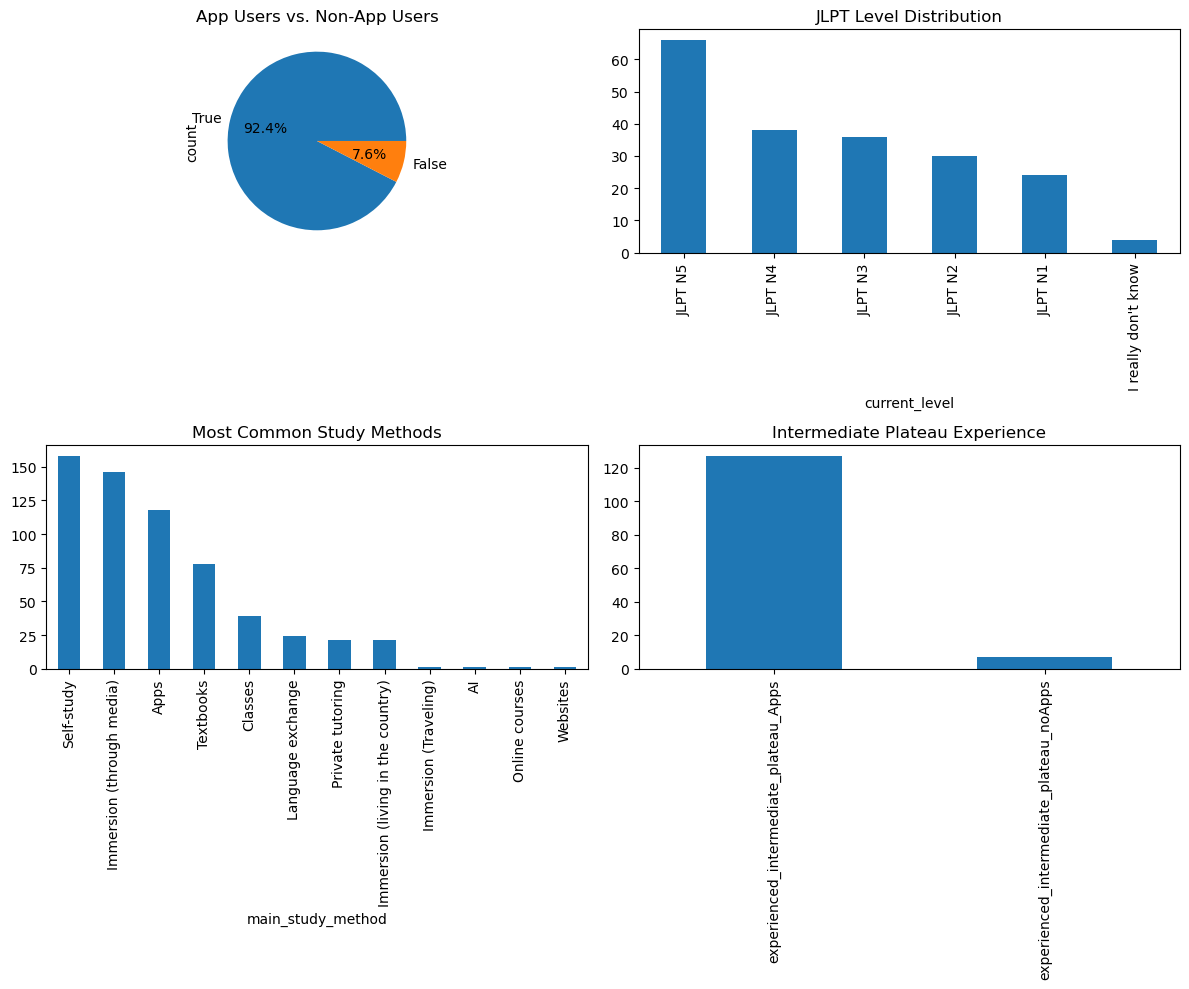

In [4]:
import matplotlib.pyplot as plt

# Overview: Count of App Users vs. Non-App Users
app_users_count = survey_results_clean['has_participant_used_apps'].value_counts()

# Distribution of JLPT Levels
jlpt_distribution = survey_results_clean['current_level'].value_counts()

# Most Common Study Methods
study_methods = survey_results_clean['main_study_method'].explode().value_counts(dropna=False)

# Intermediate Plateau Experience (Both Groups)
plateau_experience = survey_results_clean[['experienced_intermediate_plateau_Apps', 'experienced_intermediate_plateau_noApps']].sum()

# Print Results
print("App Users vs. Non-App Users:")
print(app_users_count)
print("\nJLPT Level Distribution:")
print(jlpt_distribution)
print("\nMost Common Study Methods:")
print(study_methods)
print("\nIntermediate Plateau Experience:")
print(plateau_experience)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Pie Chart: App Users vs. Non-App Users
app_users_count.plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 0], title="App Users vs. Non-App Users")

# Bar Chart: JLPT Level Distribution
jlpt_distribution.plot(kind='bar', ax=axes[0, 1], title="JLPT Level Distribution")

# Bar Chart: Most Common Study Methods
study_methods.plot(kind='bar', ax=axes[1, 0], title="Most Common Study Methods")

# Bar Chart: Plateau Experience
plateau_experience.plot(kind='bar', ax=axes[1, 1], title="Intermediate Plateau Experience")

plt.tight_layout()
plt.show()


In [5]:
intermediate_plateau_participants = survey_results_clean[(survey_results_clean["current_level"]!="I really don't know")&((survey_results_clean["experienced_intermediate_plateau_Apps"]==True)|(survey_results_clean["experienced_intermediate_plateau_noApps"]==True))]

intermediate_plateau_participants.count()

Timestamp                                                                                                              130
current_level                                                                                                          130
study_years                                                                                                            130
native_languages                                                                                                       130
other_languages                                                                                                        100
main_study_method                                                                                                      130
has_participant_used_apps                                                                                              130
reason_noApps                                                                                                          130
considered_using

In [6]:
intermediate_plateau_participants = survey_results_clean[(survey_results_clean["experienced_intermediate_plateau_Apps"]==False)|(survey_results_clean["experienced_intermediate_plateau_noApps"]==False)]

intermediate_plateau_participants.count()

Timestamp                                                                                                              64
current_level                                                                                                          64
study_years                                                                                                            64
native_languages                                                                                                       64
other_languages                                                                                                        50
main_study_method                                                                                                      64
has_participant_used_apps                                                                                              64
reason_noApps                                                                                                          64
considered_using_noApps 

# Current JLPT level vs main study method

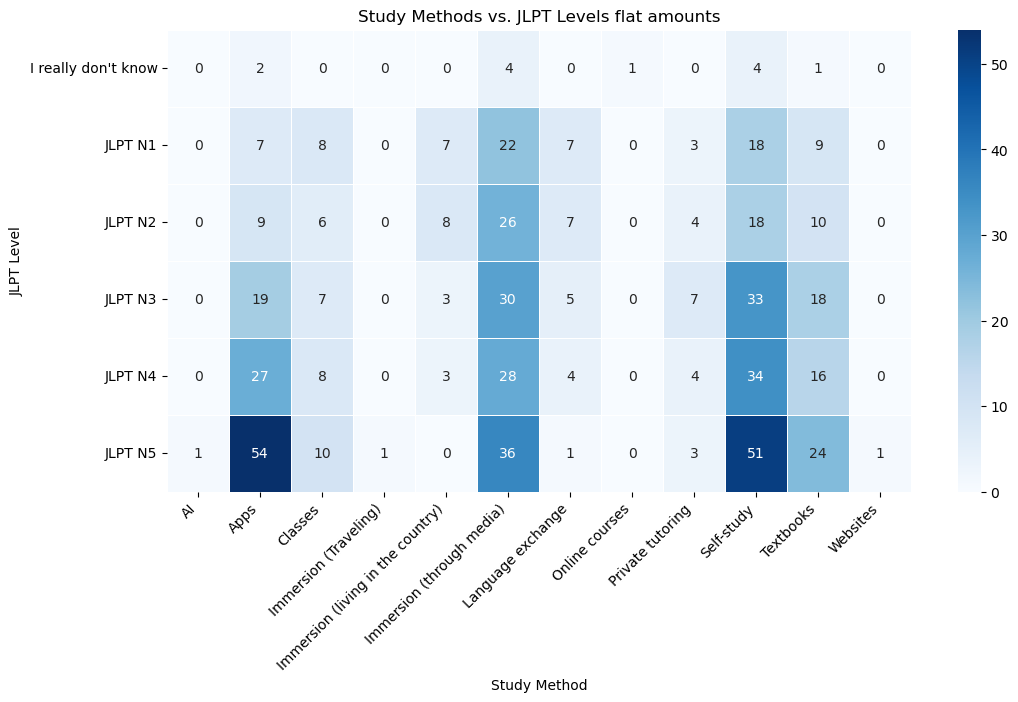

In [7]:
import seaborn as sns

# Load Data
# Explode 'main_study_method' to analyze individual methods
survey_results_exploded = survey_results_clean.explode('main_study_method')

# Count occurrences of each study method per JLPT level
study_method_counts = survey_results_exploded.groupby(['current_level', 'main_study_method']).size().unstack().fillna(0)

# Plot heatmap to visualize study method distribution across JLPT levels
plt.figure(figsize=(12, 6))
sns.heatmap(study_method_counts, cmap='Blues', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Study Methods vs. JLPT Levels flat amounts')
plt.xlabel('Study Method')
plt.ylabel('JLPT Level')
plt.xticks(rotation=45, ha='right')
plt.show()

In [8]:
main_study_method_exploded = survey_results_clean.explode("main_study_method")

study_method_counts = main_study_method_exploded.groupby(["current_level", "main_study_method"]).size().unstack(fill_value=0)

level_counts = survey_results_clean["current_level"].value_counts().sort_index()

normalized_df = study_method_counts.div(level_counts, axis=0)

print(normalized_df)

main_study_method          AI      Apps   Classes  Immersion (Traveling)  \
current_level                                                              
I really don't know  0.000000  0.500000  0.000000               0.000000   
JLPT N1              0.000000  0.291667  0.333333               0.000000   
JLPT N2              0.000000  0.300000  0.200000               0.000000   
JLPT N3              0.000000  0.527778  0.194444               0.000000   
JLPT N4              0.000000  0.710526  0.210526               0.000000   
JLPT N5              0.015152  0.818182  0.151515               0.015152   

main_study_method    Immersion (living in the country)  \
current_level                                            
I really don't know                           0.000000   
JLPT N1                                       0.291667   
JLPT N2                                       0.266667   
JLPT N3                                       0.083333   
JLPT N4                                    

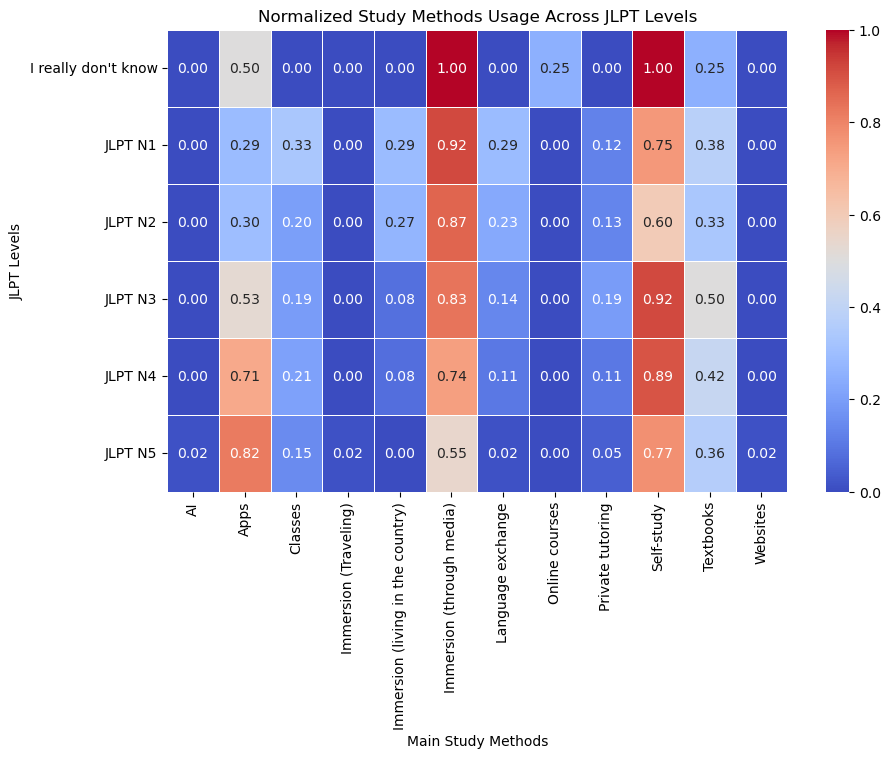

In [9]:
# Plot a heatmap of normalized study methods across JLPT levels
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Normalized Study Methods Usage Across JLPT Levels")
plt.xlabel("Main Study Methods")
plt.ylabel("JLPT Levels")
plt.show()


# Native language counts

native_languages
English                        84
German                         16
Dutch                          14
Spanish                        10
Portuguese                      7
Swedish                         5
French                          5
Chinese                         4
Italian                         3
Russian                         3
English, Malay                  3
English, Chinese                3
Thai                            3
Finnish                         2
Hindi                           2
Czech                           2
Ukrainian                       2
English, Hindi                  2
English, French                 2
English, Spanish                2
English, Polish                 1
Dutch, Limburgish               1
Spanish, Catalan                1
Slovak                          1
Filipino                        1
Spanish, Galician               1
English, Bangla                 1
English, Yoruba                 1
Cantonese                      

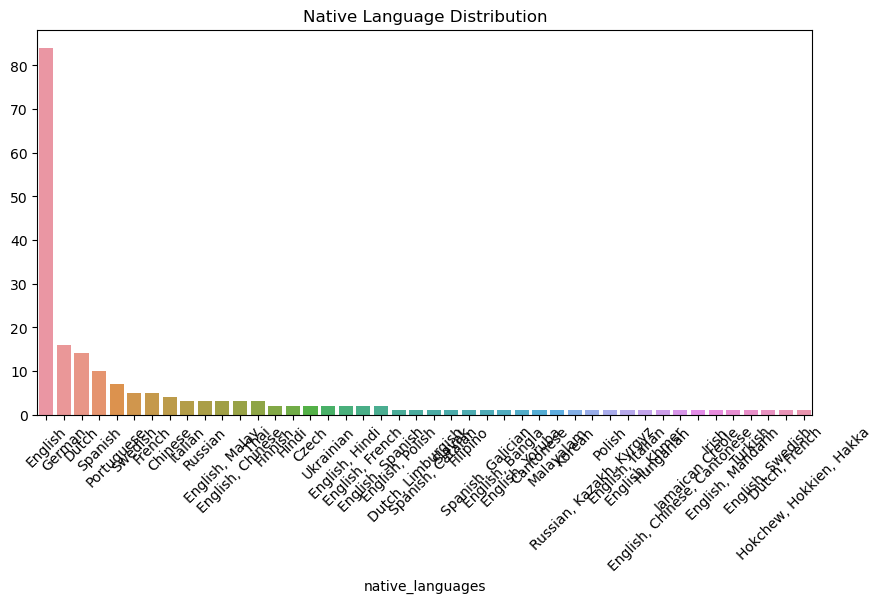

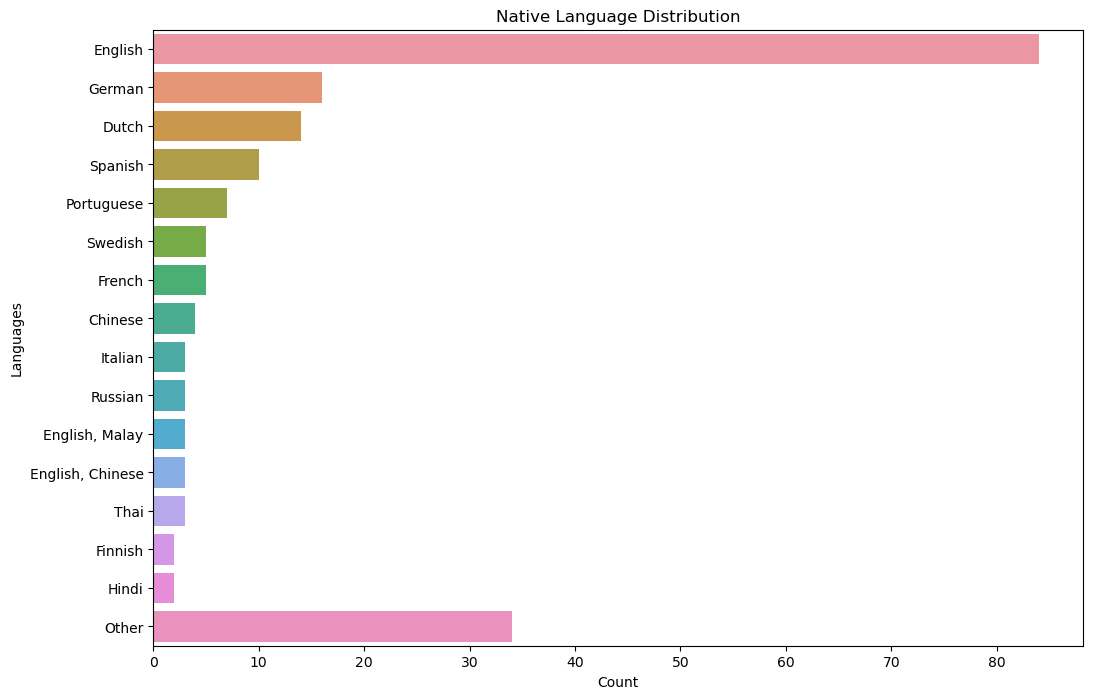

| Language         |   Count |   Percentage |
|:-----------------|--------:|-------------:|
| English          |      84 |         42.4 |
| German           |      16 |          8.1 |
| Dutch            |      14 |          7.1 |
| Spanish          |      10 |          5.1 |
| Portuguese       |       7 |          3.5 |
| Swedish          |       5 |          2.5 |
| French           |       5 |          2.5 |
| Chinese          |       4 |          2   |
| Italian          |       3 |          1.5 |
| Russian          |       3 |          1.5 |
| English, Malay   |       3 |          1.5 |
| English, Chinese |       3 |          1.5 |
| Thai             |       3 |          1.5 |
| Finnish          |       2 |          1   |
| Hindi            |       2 |          1   |
| Other            |      34 |         17.2 |


C:\Users\mathi\AppData\Local\Temp\ipykernel_220628\3663597386.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_df_filtered.loc[len(table_df_filtered)] = ["Other", other_sum, (other_sum / native_counts.sum() * 100).round(1)]


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = survey_results_clean

### 1. Native & Other Languages Analysis ###
plt.figure(figsize=(10, 5))
native_counts = df['native_languages'].explode().value_counts()

print(native_counts)

sns.barplot(x=native_counts.index, y=native_counts.values)
plt.title("Native Language Distribution")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 8))
native_counts = df['native_languages'].explode().value_counts()

top_n = 15
native_counts_filtered = native_counts[:top_n]
native_counts_filtered["Other"] = native_counts[top_n:].sum()  # Group the rest as "Other"

sns.barplot(y=native_counts_filtered.index, x=native_counts_filtered.values)  # Horizontal bars
plt.title("Native Language Distribution")
plt.xlabel("Count")
plt.ylabel("Languages")
plt.show()


import pandas as pd

table_df = pd.DataFrame({
    "Language": native_counts.index,
    "Count": native_counts.values,
    "Percentage": (native_counts / native_counts.sum() * 100).round(1)
})

top_n = 15
table_df_filtered = table_df[:top_n]
other_sum = table_df[top_n:]["Count"].sum()
table_df_filtered.loc[len(table_df_filtered)] = ["Other", other_sum, (other_sum / native_counts.sum() * 100).round(1)]

print(table_df_filtered.to_markdown(index=False))  # Use `.to_latex()` if using LaTeX formatting


In [11]:
#!pip install --upgrade tabulate

# Years of study vs JLPT level

                         mean  median   std_dev  mode  count
current_level                                               
I really don't know  4.500000     3.0  3.785939     2      4
JLPT N1              5.916667     4.5  5.174492     2     24
JLPT N2              5.066667     4.5  3.609693     5     30
JLPT N3              4.444444     4.0  3.426322     5     36
JLPT N4              3.973684     2.0  5.499321     2     38
JLPT N5              1.212121     0.0  2.842075     0     66


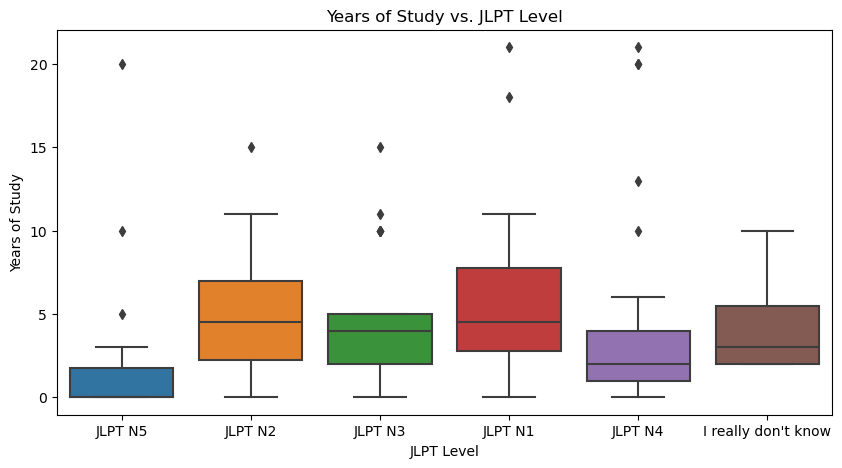

In [12]:
# Base stats using .agg()
study_years_stats = survey_results_clean.groupby("current_level")["study_years"].agg(
    mean="mean",
    median="median",
    std_dev="std",
    count="count"
)

modes = (
    survey_results_clean.groupby("current_level")["study_years"]
    .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .rename("mode")
)

study_years_stats = study_years_stats.join(modes)

study_years_stats = study_years_stats[["mean", "median", "std_dev", "mode", "count"]]

print(study_years_stats)

### 2. Years of Study vs. JLPT Level ###
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['current_level'], y=df['study_years'])
plt.title("Years of Study vs. JLPT Level")
plt.xlabel("JLPT Level")
plt.ylabel("Years of Study")
plt.show()

## Conclusion

Interesting to see is that the general length of studying between N4 - N2 is very close to each other, is this part of the effect of the intermediate plateau?
Furthermore, N1 clearly takes longer, however, some participants may have been N1 for a long time and since many people adhere to the idea that "you never stop learning a language" I do not know "when" they reached N1, and how much of their total years were spent at N1

# Study goals

study_goals
Personal interest         171
Cultural interest         128
Manga/Anime               114
Travel                     92
Connecting with others     65
Career advancement         44
Family                      5
Linguistic interest         4
Name: count, dtype: int64


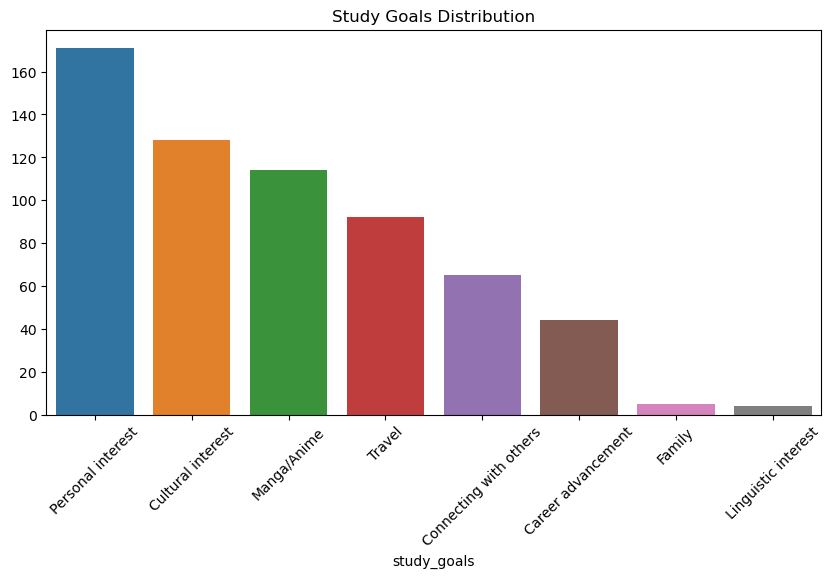

In [13]:
### 3. Study Goals ###

study_goals_counts = df['study_goals'].explode().value_counts()

print(study_goals_counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=study_goals_counts.index, y=study_goals_counts.values)
plt.title("Study Goals Distribution")
plt.xticks(rotation=45)
plt.show()

# App usage patterns

used_apps_Apps
Anki                    144
Duolingo                126
Memrise                  49
WaniKani                 48
HelloTalk                43
Renshuu                  42
BunPro                   18
Rosetta Stone            13
LingoDeer                12
MaruMori                 12
Kanji Study               6
Miraa                     6
Migaku                    5
Busuu                     5
Satori Reader             4
italki                    3
Bunpo                     3
Tandem                    3
Kanji Garden              3
Ringotan                  3
LingQ                     3
NativShark                2
kawaiiNihongo             2
Shirabe Jisho             1
Japanese                  1
Langotalk                 1
Umi                       1
Falou                     1
JalUP                     1
Flashcards Deluxe         1
Minato                    1
Quizlet                   1
Migii JLPT                1
Toggle                    1
Refold App                1
Lingu

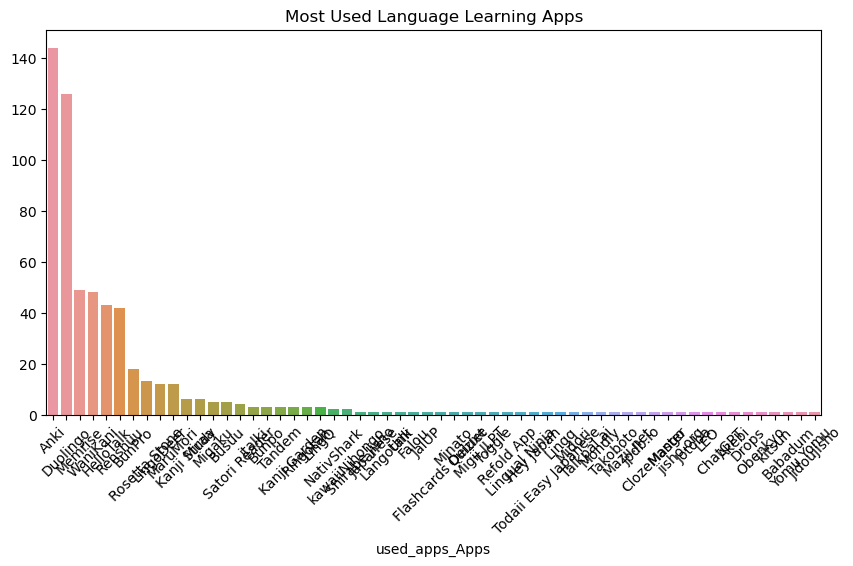

In [14]:
### 4. App Usage Patterns ###
apps_used = df['used_apps_Apps'].explode().value_counts()

print(apps_used)

plt.figure(figsize=(10, 5))
sns.barplot(x=apps_used.index, y=apps_used.values)
plt.title("Most Used Language Learning Apps")
plt.xticks(rotation=45)
plt.show()



# Most & Least Useful Features

most_useful_features_Apps
Progress tracking               133
Flashcards                      131
Vocabulary count                107
Personalization                  84
Aesthetics                       60
Streaks                          59
Levels                           50
Reminders                        47
Achievements                     41
Challenges                       31
Badges                           17
Leaderboards                     14
Friend lists                     10
Points                            9
Randomized example sentences      1
Chat with native speakers         1
Community help                    1
Name: count, dtype: int64

least_useful_features_Apps
Leaderboards         96
Friend lists         81
Badges               73
Streaks              59
Points               57
Reminders            39
Challenges           39
Levels               36
Achievements         36
Aesthetics           19
Flashcards           12
Personalization       9
Vocabulary count    

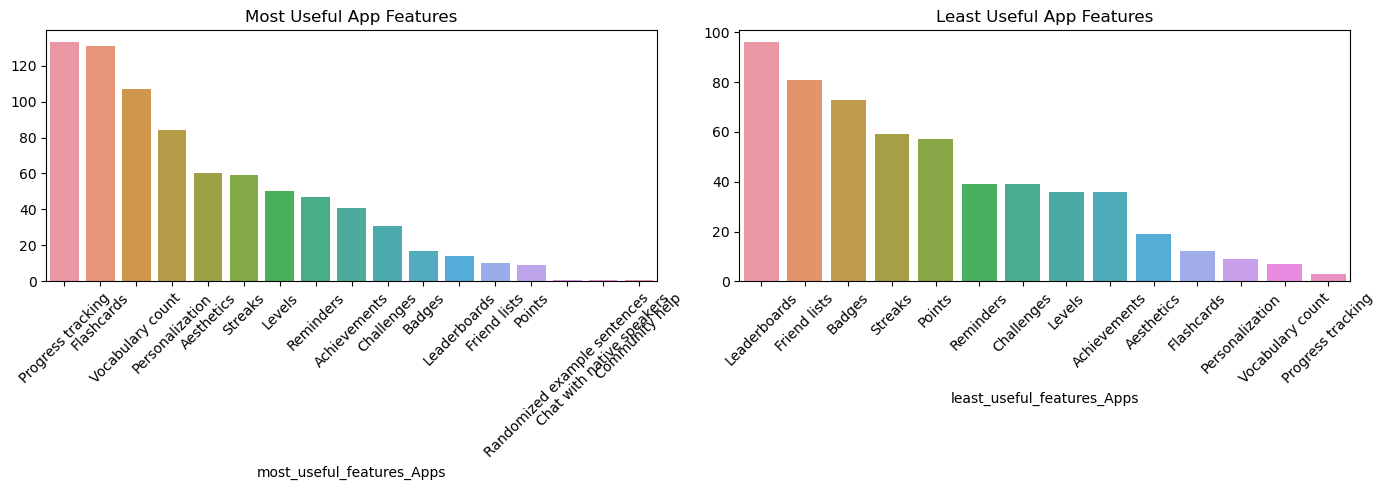

In [15]:
### 5. Most & Least Useful Features ###
most_useful = df['most_useful_features_Apps'].explode().value_counts()
least_useful = df['least_useful_features_Apps'].explode().value_counts()

print(most_useful)
print()
print(least_useful)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x=most_useful.index, y=most_useful.values, ax=axes[0])
axes[0].set_title("Most Useful App Features")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=least_useful.index, y=least_useful.values, ax=axes[1])
axes[1].set_title("Least Useful App Features")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Intermediate Plateau Analysis

when_start_intermediatePlateau
0    50
2    31
1    16
3    14
5     8
4     8
8     1
Name: count, dtype: int64


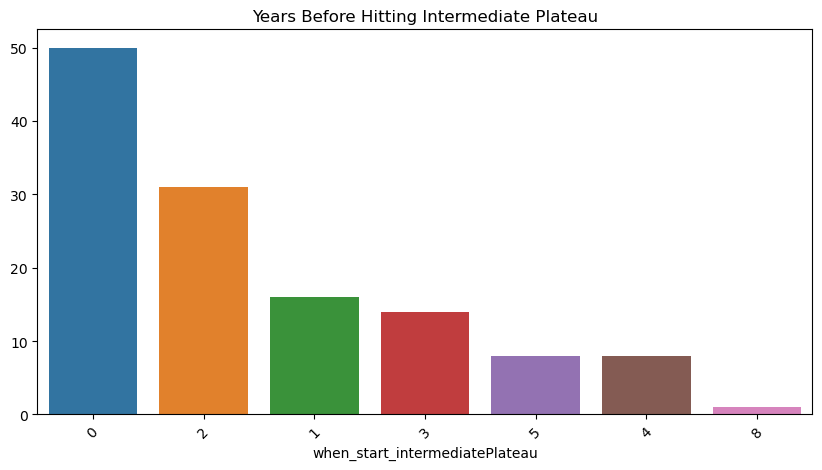

In [16]:
### 6. Intermediate Plateau Analysis ###
plt.figure(figsize=(10, 5))
plateau_counts = df['when_start_intermediatePlateau'].explode().value_counts()

print(plateau_counts)

sns.barplot(x=plateau_counts.index, y=plateau_counts.values)
plt.title("Years Before Hitting Intermediate Plateau")
plt.xticks(rotation=45)
plt.show()

what_level_start_intermediatePlateau
nan              64
JLPT N5          46
JLPT N4          34
I do not know    27
JLPT N2          12
JLPT N3          12
JLPT N1           3
Name: count, dtype: int64


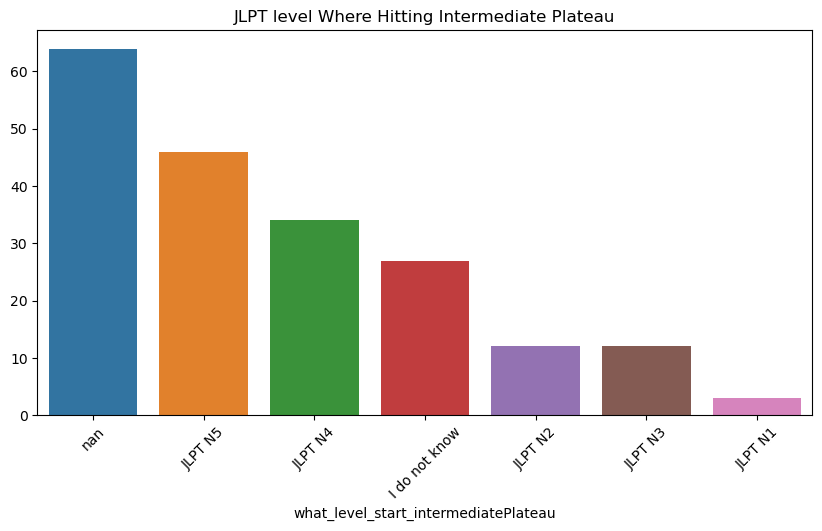

In [17]:
# When did intermediate plateau start (JLPT level)

### 6. Intermediate Plateau Analysis ###
plt.figure(figsize=(10, 5))
plateau_counts_JLPT = df['what_level_start_intermediatePlateau'].explode().value_counts()

print(plateau_counts_JLPT)

sns.barplot(x=plateau_counts_JLPT.index, y=plateau_counts_JLPT.values)
plt.title("JLPT level Where Hitting Intermediate Plateau")
plt.xticks(rotation=45)
plt.show()

I do not know               NaN
I really don't know         NaN
JLPT N1                0.125000
JLPT N2                0.400000
JLPT N3                0.333333
JLPT N4                0.894737
JLPT N5                0.696970
nan                         NaN
Name: count, dtype: float64


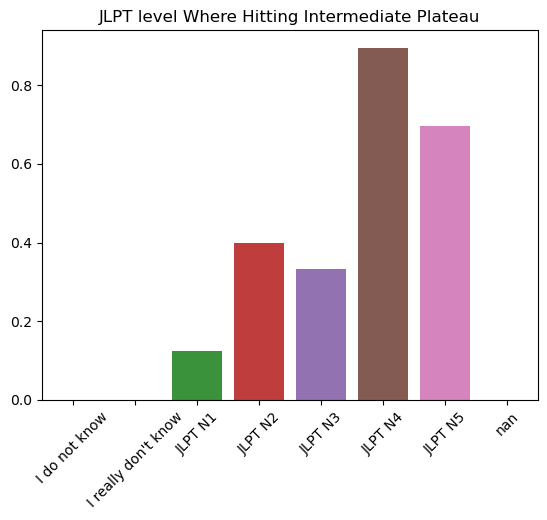

In [18]:
# How many people of each level experienced the intermediate plateau (normalized)

plateau_counts_JLPT_Normalized = plateau_counts_JLPT.div(level_counts, axis=0)

print(plateau_counts_JLPT_Normalized)

sns.barplot(x=plateau_counts_JLPT_Normalized.index, y=plateau_counts_JLPT_Normalized.values)
plt.title("JLPT level Where Hitting Intermediate Plateau")
plt.xticks(rotation=45)
plt.show()

In [19]:
print(survey_results_clean["current_level"].explode().value_counts())

intermediate_plateau_df = survey_results_clean[(survey_results_clean["experienced_intermediate_plateau_Apps"] == True)|(survey_results_clean["experienced_intermediate_plateau_noApps"] == True)]

print(intermediate_plateau_df)

current_level
JLPT N5                66
JLPT N4                38
JLPT N3                36
JLPT N2                30
JLPT N1                24
I really don't know     4
Name: count, dtype: int64


In [20]:
import pandas as pd

stats_table = survey_results_clean.groupby("current_level")["study_years"].agg(
    mean="mean",
    median="median",
    std="std",
    mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    n="count"
).reset_index()

print(stats_table.to_string(index=False))


      current_level     mean  median      std  mode  n
I really don't know 4.500000     3.0 3.785939     2  4
            JLPT N1 5.916667     4.5 5.174492     2 24
            JLPT N2 5.066667     4.5 3.609693     5 30
            JLPT N3 4.444444     4.0 3.426322     5 36
            JLPT N4 3.973684     2.0 5.499321     2 38
            JLPT N5 1.212121     0.0 2.842075     0 66


In [21]:
survey_results_clean[survey_results_clean["current_level"]=="JLPT N1"]["study_years"]

3       5
13      1
22      2
29      2
38     11
40     10
42      5
43      4
47      3
53     18
69      2
70      6
74      0
100     3
107    21
116     3
125     2
127     5
141     7
148     5
157    10
166    10
171     4
176     3
Name: study_years, dtype: int64

In [22]:
import pandas as pd

usage_table = pd.crosstab(
    survey_results_clean["current_level"], 
    survey_results_clean["has_participant_used_apps"], 
    margins=True, 
    margins_name="n"
)

usage_table = usage_table.rename(columns={True: "Used apps", False: "Didn't use apps"}).reset_index()

usage_table["n"] = usage_table["Used apps"] + usage_table["Didn't use apps"]

usage_table["Used apps (%)"] = (usage_table["Used apps"] / usage_table["n"] * 100).round(2)
usage_table["Didn't use apps (%)"] = (usage_table["Didn't use apps"] / usage_table["n"] * 100).round(2)

usage_table = usage_table[["current_level", "Used apps", "Didn't use apps", "Used apps (%)", "Didn't use apps (%)", "n"]]

print(usage_table.to_string(index=False))


      current_level  Used apps  Didn't use apps  Used apps (%)  Didn't use apps (%)   n
I really don't know          3                1          75.00                25.00   4
            JLPT N1         16                8          66.67                33.33  24
            JLPT N2         29                1          96.67                 3.33  30
            JLPT N3         33                3          91.67                 8.33  36
            JLPT N4         37                1          97.37                 2.63  38
            JLPT N5         65                1          98.48                 1.52  66
                  n        183               15          92.42                 7.58 198


# Correlation matrix of all columns

# WRQ1: What gamification methods are applied in the current GLA's & GPALT's?

In [24]:

all_gamification_values = survey_results_clean[
    ["most_useful_features_Apps", "least_useful_features_Apps", "no_longer_useful_Apps"]
].values.ravel()

flat_gamification_values = [
    item
    for sublist in all_gamification_values
    if isinstance(sublist, list)
    for item in sublist
    if item is not None
]

WRQ1_gamification_list = list(set(flat_gamification_values))

WRQ1_gamification_list.sort()

print(WRQ1_gamification_list)

['Achievements', 'Aesthetics', 'Badges', 'Challenges', 'Chat with native speakers', 'Community help', 'Flashcards', 'Friend lists', 'Leaderboards', 'Levels', 'Personalization', 'Points', 'Progress tracking', 'Randomized example sentences', 'Reminders', 'Streaks', 'Vocabulary count']


# WRQ1 Conclusion
For this step I took the three questions that questioned participants about the gamification mechanics, being:
- What are the most useful features in apps?
- What are the least useful features in apps?
- What are features you thought were useful, but no longer think are?

I then took all the values in these lists and combined them into a new list that sums up every gamification method mentioned.

# WRQ2: How do Japanese learners experience these apps, the different gamified mechanics in these apps and their effectiveness for intermediate to higher level language learning?

Useful columns:
    
current_level

has_participant_used_apps

used_apps_Apps

most_useful_Apps

most_useful_current_level_Apps

skill_improvement_usage_habits_Apps

most_useful_features_Apps

least_useful_features_Apps

no_longer_useful_Apps

comparative_enjoyment_other_methods_Apps

feel_apps_help_Apps

daily_study_time_Apps

current_level

why_continue_usage_Apps

use_to_overcome_challenges_noApps
overcoming_challenges_noApps
daily_study_time_noApps
structured_vs_flexible_learning_noApps

other_tools_noApps
why_other_tools_noApps
most_effective_noApps
least_effective_noApps

- How do they experience the apps
- How do they experience the mechanics in the apps
- How do they experience the effectiveness (+ for intermediate to advanced)

In [25]:
used_apps = survey_results_clean["used_apps_Apps"].explode().value_counts()
most_useful_apps = survey_results_clean["most_useful_Apps"].explode().value_counts()
most_useful_current_level_Apps = survey_results_clean["most_useful_current_level_Apps"].explode().value_counts()
skill_improvement_usage_habits = survey_results_clean["skill_improvement_usage_habits_Apps"].explode().value_counts()
most_useful_features = survey_results_clean["most_useful_features_Apps"].explode().value_counts()
least_useful_features = survey_results_clean["least_useful_features_Apps"].explode().value_counts()
no_longer_useful_features = survey_results_clean["no_longer_useful_Apps"].explode().value_counts()
comparative_enjoyment_other_methods = survey_results_clean["comparative_enjoyment_other_methods_Apps"].explode().value_counts()
feel_apps_help = survey_results_clean["feel_apps_help_Apps"].explode().value_counts()
why_continue_usage = survey_results_clean["why_continue_usage_Apps"].explode().value_counts()


In [26]:
N1_participants = survey_results_clean[survey_results_clean["current_level"]=="JLPT N1"]
N1_participants_used_apps = N1_participants[N1_participants["has_participant_used_apps"]==True]["used_apps_Apps"].explode().value_counts()
print(f"N1 participants used apps: \n{N1_participants_used_apps.to_string(index=True, header=False)}\n")

N1_participants_most_useful_apps = N1_participants[N1_participants["has_participant_used_apps"]==True]["most_useful_Apps"].explode().value_counts(dropna=False)
print(f"N1 participants most useful apps: \n{N1_participants_most_useful_apps.to_string(index=True, header=False)}\n")

N1_participants_most_useful_current_apps = N1_participants[N1_participants["has_participant_used_apps"]==True]["most_useful_current_level_Apps"].explode().value_counts(dropna=False)
print(f"N1 participants most useful apps at current level: \n{N1_participants_most_useful_current_apps.to_string(index=True, header=False)}\n")

N1_participants_most_useful_features = N1_participants[N1_participants["has_participant_used_apps"]==True]["most_useful_features_Apps"].explode().value_counts(dropna=False)
print(f"N1 participants most useful features: \n{N1_participants_most_useful_features.to_string(index=True, header=False)}\n")

N1_participants_least_useful_features = N1_participants[N1_participants["has_participant_used_apps"]==True]["least_useful_features_Apps"].explode().value_counts(dropna=False)
print(f"N1 participants least useful features: \n{N1_participants_least_useful_features.to_string(index=True, header=False)}\n")

N1_participants_no_longer_useful_features = N1_participants[N1_participants["has_participant_used_apps"]==True]["no_longer_useful_Apps"].explode().value_counts(dropna=False)
print(f"N1 participants no longer useful features: \n{N1_participants_no_longer_useful_features.to_string(index=True, header=False)}\n")

N1_participants_skill_improvement_habits = N1_participants[N1_participants["has_participant_used_apps"]==True]["skill_improvement_usage_habits_Apps"].explode().value_counts(dropna=False)
print(f"N1 participants changes in use of features as skill level increases: \n{N1_participants_skill_improvement_habits.to_string(index=True, header=False)}\n")

N1_participants_comparative_enjoyment = N1_participants[N1_participants["has_participant_used_apps"]==True]["comparative_enjoyment_other_methods_Apps"].explode().value_counts(dropna=False)
print(f"N1 participants comparative enjoyment of apps compared to other methods: \n{N1_participants_comparative_enjoyment.to_string(index=True, header=False)}\n")

N1_participants_feel_apps_help = N1_participants[N1_participants["has_participant_used_apps"]==True]["feel_apps_help_Apps"].explode().value_counts(dropna=False)
print(f"N1 participants do they feel that apps help them?: \n{N1_participants_feel_apps_help.to_string(index=True, header=False)}\n")

N1_participants_why_continue_using = N1_participants[N1_participants["has_participant_used_apps"]==True]["why_continue_usage_Apps"].explode().value_counts(dropna=False)
print(f"N1 participants why do they continue to use these apps?: \n{N1_participants_why_continue_using.to_string(index=True, header=False)}\n")


N1 participants used apps: 
Anki         16
Duolingo      7
HelloTalk     6
Memrise       4
Renshuu       2
Tandem        1
WaniKani      1
italki        1

N1 participants most useful apps: 
Anki         15
HelloTalk     3
None          1
Renshuu       1
WaniKani      1
Memrise       1

N1 participants most useful apps at current level: 
Anki         10
None          3
HelloTalk     2
italki        1

N1 participants most useful features: 
Flashcards           14
Personalization       9
Progress tracking     9
Vocabulary count      6
Streaks               5
Aesthetics            3
Levels                2
None                  2
Badges                1
Reminders             1
Points                1
Challenges            1
Achievements          1

N1 participants least useful features: 
Leaderboards        9
Badges              8
Friend lists        7
Points              6
Levels              6
Achievements        6
Streaks             5
Reminders           4
Challenges          3
None

In [27]:

main_study_method_exploded = survey_results_clean[survey_results_clean["current_level"] != "I really don't know"].explode("main_study_method")

study_method_counts = main_study_method_exploded.groupby(["current_level", "main_study_method"]).size().unstack(fill_value=0)

level_counts_all = survey_results_clean[survey_results_clean["current_level"] != "I really don't know"]["current_level"].value_counts().sort_index()

level_counts = survey_results_clean[(survey_results_clean["current_level"] != "I really don't know") & 
    (survey_results_clean["has_participant_used_apps"] == True)]["current_level"].value_counts().sort_index()

normalized_df = study_method_counts.div(level_counts_all, axis=0)

percentage_df = normalized_df * 100
percentage_df = percentage_df.round(3)

print(percentage_df)

main_study_method     AI    Apps  Classes  Immersion (Traveling)  \
current_level                                                      
JLPT N1            0.000  29.167   33.333                  0.000   
JLPT N2            0.000  30.000   20.000                  0.000   
JLPT N3            0.000  52.778   19.444                  0.000   
JLPT N4            0.000  71.053   21.053                  0.000   
JLPT N5            1.515  81.818   15.152                  1.515   

main_study_method  Immersion (living in the country)  \
current_level                                          
JLPT N1                                       29.167   
JLPT N2                                       26.667   
JLPT N3                                        8.333   
JLPT N4                                        7.895   
JLPT N5                                        0.000   

main_study_method  Immersion (through media)  Language exchange  \
current_level                                                  

In [28]:
main_study_method_exploded = survey_results_clean[survey_results_clean["current_level"] != "I really don't know"].explode("main_study_method")

study_method_counts = main_study_method_exploded.groupby(["current_level", "main_study_method"]).size().unstack(fill_value=0)

level_counts_all = survey_results_clean[survey_results_clean["current_level"] != "I really don't know"]["current_level"].value_counts().sort_index()

study_method_counts["N"] = level_counts_all

normalized_df = study_method_counts.div(level_counts_all, axis=0) * 100

percentage_df = normalized_df.drop(columns=["N"]).round(1)

percentage_df = percentage_df[["Apps", "Classes", "Immersion (Traveling)", "Immersion (living in the country)", "Immersion (through media)", "Language exchange", "Private tutoring", "Self-study", "Textbooks","AI","Websites"]]

print("Actual Values (N per JLPT level included):")
print(study_method_counts)

print("\nPercentage Values:")
print(percentage_df)


Actual Values (N per JLPT level included):
main_study_method  AI  Apps  Classes  Immersion (Traveling)  \
current_level                                                 
JLPT N1             0     7        8                      0   
JLPT N2             0     9        6                      0   
JLPT N3             0    19        7                      0   
JLPT N4             0    27        8                      0   
JLPT N5             1    54       10                      1   

main_study_method  Immersion (living in the country)  \
current_level                                          
JLPT N1                                            7   
JLPT N2                                            8   
JLPT N3                                            3   
JLPT N4                                            3   
JLPT N5                                            0   

main_study_method  Immersion (through media)  Language exchange  \
current_level                                          

In [29]:
study_method_counts.T

current_level                      JLPT N1  JLPT N2  JLPT N3  JLPT N4  JLPT N5
main_study_method                                                             
AI                                       0        0        0        0        1
Apps                                     7        9       19       27       54
Classes                                  8        6        7        8       10
Immersion (Traveling)                    0        0        0        0        1
Immersion (living in the country)        7        8        3        3        0
Immersion (through media)               22       26       30       28       36
Language exchange                        7        7        5        4        1
Private tutoring                         3        4        7        4        3
Self-study                              18       18       33       34       51
Textbooks                                9       10       18       16       24
Websites                                 0        0        0        0        1
N                                       24       30       36       38       66

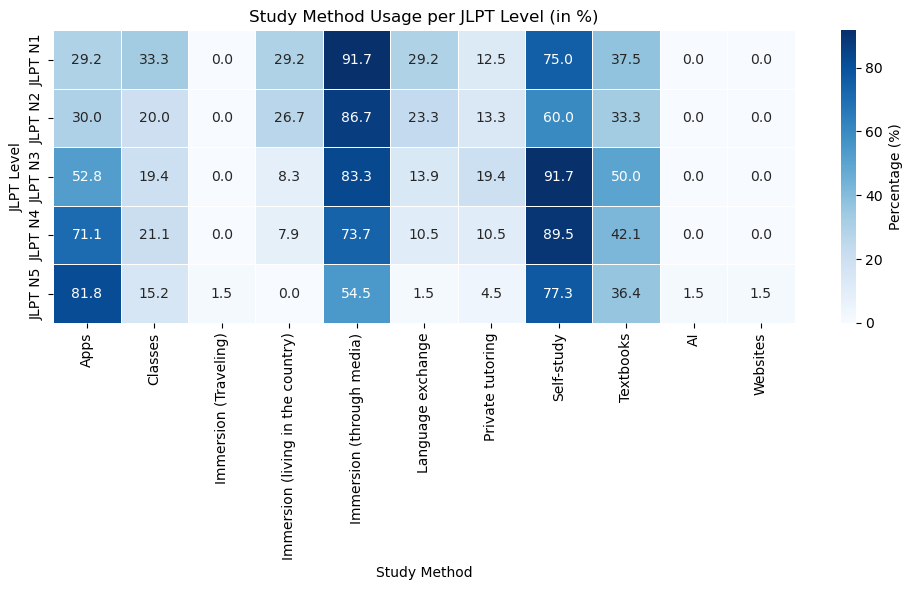

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_df, annot=True, fmt=".1f", cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Percentage (%)'})
plt.title("Study Method Usage per JLPT Level (in %)")
plt.ylabel("JLPT Level")
plt.xlabel("Study Method")
plt.tight_layout()
plt.show()


In [31]:
most_useful_current_level_Apps_exploded = survey_results_clean[(survey_results_clean["current_level"] != "I really don't know")&(survey_results_clean["has_participant_used_apps"] == True)].explode("most_useful_current_level_Apps")

most_useful_current_level_Apps_counts = most_useful_current_level_Apps_exploded.groupby(["current_level", "most_useful_current_level_Apps"]).size().unstack(fill_value=0)

most_useful_current_level_Apps_counts["n"] = level_counts

most_useful_current_level_Apps_normalized_df = most_useful_current_level_Apps_counts.div(level_counts, axis=0)

most_useful_current_level_Apps_percentage_df = most_useful_current_level_Apps_normalized_df * 100
most_useful_current_level_Apps_percentage_df = most_useful_current_level_Apps_percentage_df.round(3)  # Optional: round to 1 decimal place

print(most_useful_current_level_Apps_percentage_df)


most_useful_current_level_Apps  Akebi    Anki  BunPro  Bunpo  Busuu  Duolingo  \
current_level                                                                   
JLPT N1                         0.000  62.500   0.000  0.000  0.000     0.000   
JLPT N2                         0.000  55.172   6.897  0.000  0.000     0.000   
JLPT N3                         0.000  45.455   6.061  0.000  0.000     6.061   
JLPT N4                         2.703  21.622   5.405  2.703  0.000     5.405   
JLPT N5                         0.000  20.000   6.154  0.000  1.538    24.615   

most_useful_current_level_Apps  Flashcards Deluxe  HelloTalk  Kanji  \
current_level                                                         
JLPT N1                                     0.000     12.500  0.000   
JLPT N2                                     3.448      0.000  0.000   
JLPT N3                                     0.000      3.030  0.000   
JLPT N4                                     0.000      2.703  2.703   
JLPT N

In [32]:
most_useful_current_level_Apps_counts.T

current_level                   JLPT N1  JLPT N2  JLPT N3  JLPT N4  JLPT N5
most_useful_current_level_Apps                                             
Akebi                                 0        0        0        1        0
Anki                                 10       16       15        8       13
BunPro                                0        2        2        2        4
Bunpo                                 0        0        0        1        0
Busuu                                 0        0        0        0        1
Duolingo                              0        0        2        2       16
Flashcards Deluxe                     0        1        0        0        0
HelloTalk                             2        0        1        1        0
Kanji                                 0        0        0        1        0
Kanji Study                           0        0        0        1        1
LIngodeer                             0        0        0        0        1
LingQ                                 0        1        2        0        0
LingoDeer                             0        0        0        0        1
MaruMori                              0        0        1        3        5
Memrise                               0        0        0        3        1
Midori                                0        0        0        1        0
Migaku                                0        0        3        2        2
Minato                                0        0        0        0        2
Miraa                                 0        1        0        0        0
Renshuu                               0        0        0        1        0
Shirabe Jisho                         0        0        0        0        1
WaniKani                              0        1        2        5       13
italki                                1        0        1        1        0
n                                    16       29       33       37       65

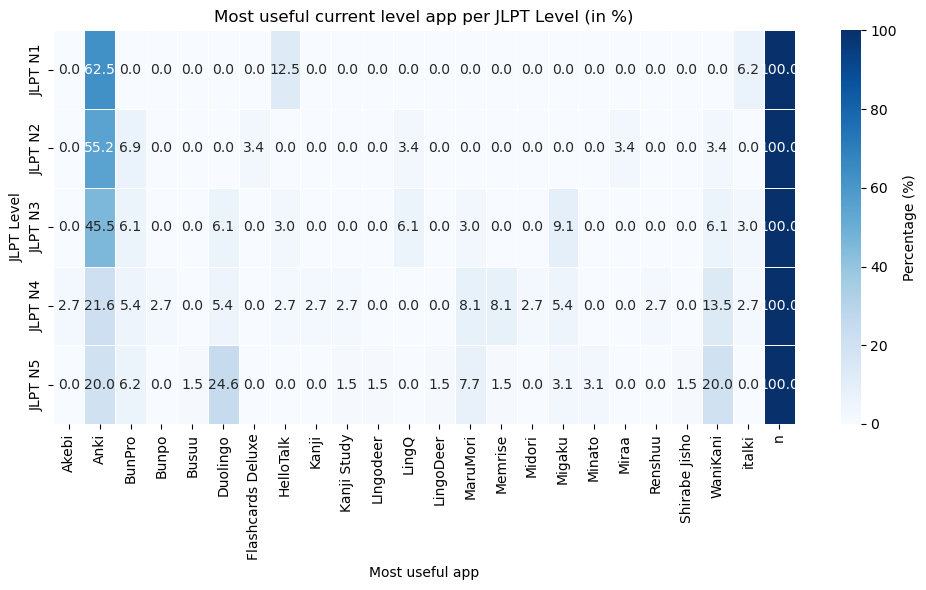

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(most_useful_current_level_Apps_percentage_df, annot=True, fmt=".1f", cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Percentage (%)'})
plt.title("Most useful current level app per JLPT Level (in %)")
plt.ylabel("JLPT Level")
plt.xlabel("Most useful app")
plt.tight_layout()
plt.show()


### Features

most_useful_features_Apps  Achievements  Aesthetics  Badges  Challenges  \
current_level                                                             
JLPT N1                           6.250      18.750   6.250       6.250   
JLPT N2                          13.793      27.586  10.345      13.793   
JLPT N3                          18.182      33.333   9.091       6.061   
JLPT N4                          32.432      48.649  16.216      21.622   
JLPT N5                          27.692      29.231   6.154      23.077   

most_useful_features_Apps  Chat with native speakers  Community help  \
current_level                                                          
JLPT N1                                        0.000           0.000   
JLPT N2                                        0.000           0.000   
JLPT N3                                        0.000           0.000   
JLPT N4                                        2.703           2.703   
JLPT N5                                   

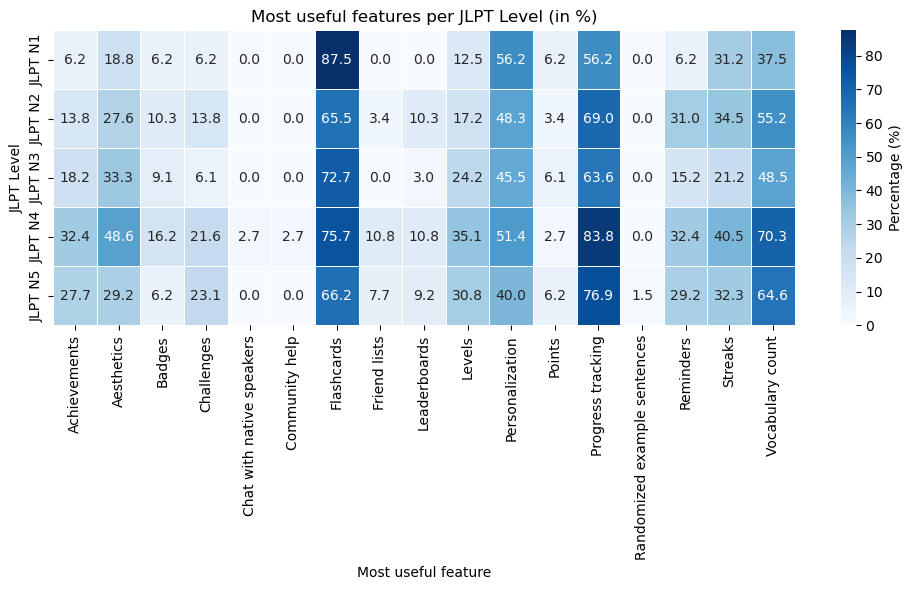

In [34]:
# Most useful features per level

most_useful_features_exploded = survey_results_clean[(survey_results_clean["current_level"] != "I really don't know")&(survey_results_clean["has_participant_used_apps"] == True)].explode("most_useful_features_Apps")

most_useful_features_counts = most_useful_features_exploded.groupby(["current_level", "most_useful_features_Apps"]).size().unstack(fill_value=0)

most_useful_features_normalized_df = most_useful_features_counts.div(level_counts, axis=0)

most_useful_features_percentage_df = most_useful_features_normalized_df * 100
most_useful_features_percentage_df = most_useful_features_percentage_df.round(3)

print(most_useful_features_percentage_df)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(most_useful_features_percentage_df, annot=True, fmt=".1f", cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Percentage (%)'})
plt.title("Most useful features per JLPT Level (in %)")
plt.ylabel("JLPT Level")
plt.xlabel("Most useful feature")
plt.tight_layout()
plt.show()


In [35]:
most_useful_features_counts.T

current_level                 JLPT N1  JLPT N2  JLPT N3  JLPT N4  JLPT N5
most_useful_features_Apps                                                
Achievements                        1        4        6       12       18
Aesthetics                          3        8       11       18       19
Badges                              1        3        3        6        4
Challenges                          1        4        2        8       15
Chat with native speakers           0        0        0        1        0
Community help                      0        0        0        1        0
Flashcards                         14       19       24       28       43
Friend lists                        0        1        0        4        5
Leaderboards                        0        3        1        4        6
Levels                              2        5        8       13       20
Personalization                     9       14       15       19       26
Points                              1        1        2        1        4
Progress tracking                   9       20       21       31       50
Randomized example sentences        0        0        0        0        1
Reminders                           1        9        5       12       19
Streaks                             5       10        7       15       21
Vocabulary count                    6       16       16       26       42

least_useful_features_Apps  Achievements  Aesthetics  Badges  Challenges  \
current_level                                                              
JLPT N1                           37.500      12.500  50.000      18.750   
JLPT N2                           41.379      20.690  51.724      34.483   
JLPT N3                           18.182       9.091  48.485      27.273   
JLPT N4                           16.216       5.405  29.730      16.216   
JLPT N5                            9.231       7.692  33.846      16.923   

least_useful_features_Apps  Flashcards  Friend lists  Leaderboards  Levels  \
current_level                                                                
JLPT N1                         12.500        43.750        56.250  37.500   
JLPT N2                          6.897        48.276        51.724  34.483   
JLPT N3                          6.061        54.545        63.636  18.182   
JLPT N4                          8.108        24.324        51.351  16.216   

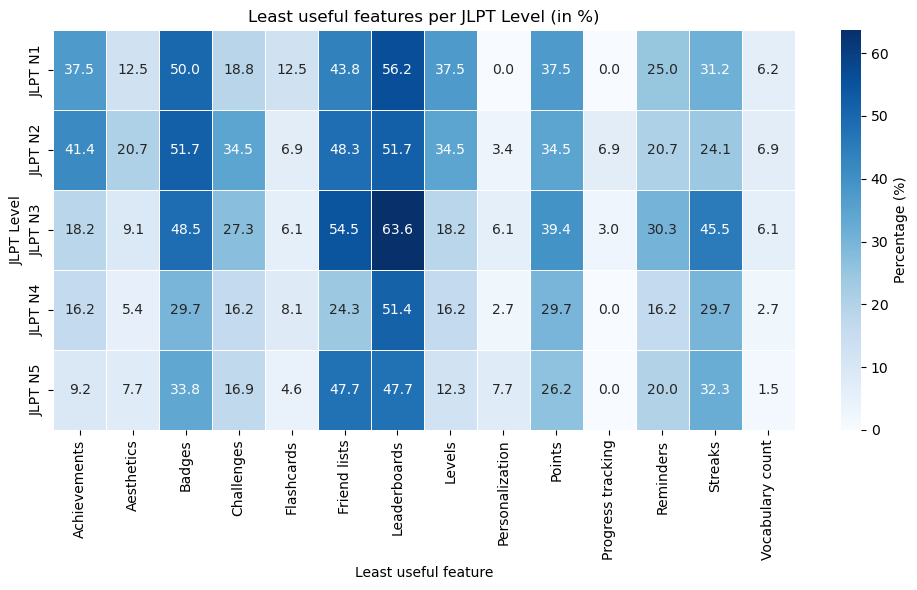

In [36]:
# Least useful features per level

least_useful_features_exploded = survey_results_clean[(survey_results_clean["current_level"] != "I really don't know")&(survey_results_clean["has_participant_used_apps"] == True)].explode("least_useful_features_Apps")

least_useful_features_counts = least_useful_features_exploded.groupby(["current_level", "least_useful_features_Apps"]).size().unstack(fill_value=0)

least_useful_features_normalized_df = least_useful_features_counts.div(level_counts, axis=0)

least_useful_features_percentage_df = least_useful_features_normalized_df * 100
least_useful_features_percentage_df = least_useful_features_percentage_df.round(3)

print(least_useful_features_percentage_df)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(least_useful_features_percentage_df, annot=True, fmt=".1f", cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Percentage (%)'})
plt.title("Least useful features per JLPT Level (in %)")
plt.ylabel("JLPT Level")
plt.xlabel("Least useful feature")
plt.tight_layout()
plt.show()


In [37]:
least_useful_features_counts["n"] = level_counts  # Adds N per level

least_useful_features_counts.T

current_level               JLPT N1  JLPT N2  JLPT N3  JLPT N4  JLPT N5
least_useful_features_Apps                                             
Achievements                      6       12        6        6        6
Aesthetics                        2        6        3        2        5
Badges                            8       15       16       11       22
Challenges                        3       10        9        6       11
Flashcards                        2        2        2        3        3
Friend lists                      7       14       18        9       31
Leaderboards                      9       15       21       19       31
Levels                            6       10        6        6        8
Personalization                   0        1        2        1        5
Points                            6       10       13       11       17
Progress tracking                 0        2        1        0        0
Reminders                         4        6       10        6       13
Streaks                           5        7       15       11       21
Vocabulary count                  1        2        2        1        1
n                                16       29       33       37       65

no_longer_useful_Apps  Achievements  Aesthetics  Badges  Challenges  \
current_level                                                         
JLPT N1                      12.500       6.250   6.250       6.250   
JLPT N2                       3.448      17.241   0.000       3.448   
JLPT N3                       6.061       9.091  12.121       9.091   
JLPT N4                      13.514      10.811  10.811       8.108   
JLPT N5                       6.154       4.615   9.231       9.231   

no_longer_useful_Apps  Flashcards  Friend lists  Leaderboards  Levels  \
current_level                                                           
JLPT N1                     0.000         0.000         6.250  12.500   
JLPT N2                     6.897         6.897         6.897   6.897   
JLPT N3                     6.061        12.121         9.091  12.121   
JLPT N4                     2.703         2.703        18.919   5.405   
JLPT N5                     1.538         3.077        23.077   

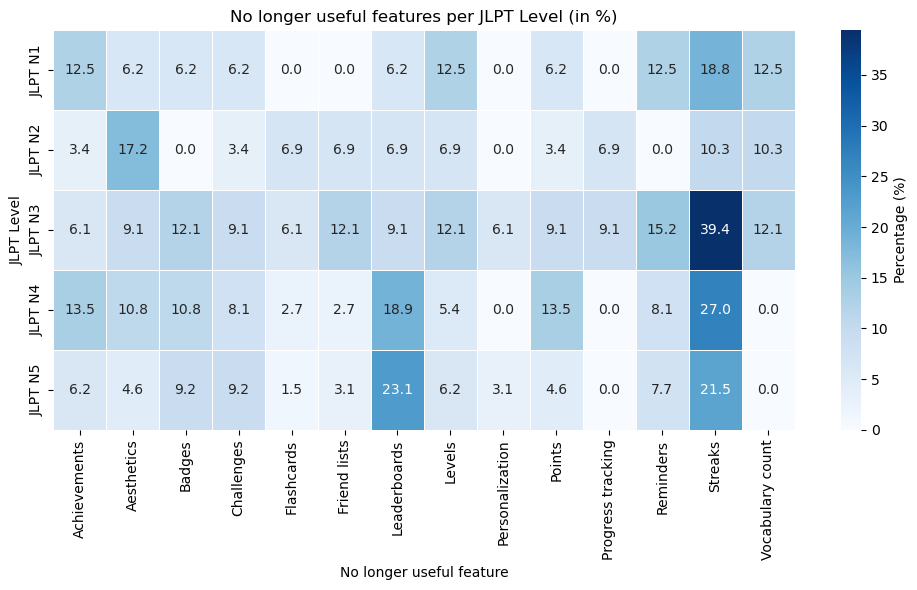

In [38]:
# No longer useful features per level

no_longer_useful_features_exploded = survey_results_clean[(survey_results_clean["current_level"] != "I really don't know")&(survey_results_clean["has_participant_used_apps"] == True)].explode("no_longer_useful_Apps")

no_longer_useful_features_counts = no_longer_useful_features_exploded.groupby(["current_level", "no_longer_useful_Apps"]).size().unstack(fill_value=0)

no_longer_useful_features_normalized_df = no_longer_useful_features_counts.div(level_counts, axis=0)

no_longer_useful_features_percentage_df = no_longer_useful_features_normalized_df * 100
no_longer_useful_features_percentage_df = no_longer_useful_features_percentage_df.round(3)

print(no_longer_useful_features_percentage_df)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(no_longer_useful_features_percentage_df, annot=True, fmt=".1f", cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Percentage (%)'})
plt.title("No longer useful features per JLPT Level (in %)")
plt.ylabel("JLPT Level")
plt.xlabel("No longer useful feature")
plt.tight_layout()
plt.show()


In [39]:
no_longer_useful_features_counts["n"] = level_counts  # Adds N per level

no_longer_useful_features_counts.T

current_level          JLPT N1  JLPT N2  JLPT N3  JLPT N4  JLPT N5
no_longer_useful_Apps                                             
Achievements                 2        1        2        5        4
Aesthetics                   1        5        3        4        3
Badges                       1        0        4        4        6
Challenges                   1        1        3        3        6
Flashcards                   0        2        2        1        1
Friend lists                 0        2        4        1        2
Leaderboards                 1        2        3        7       15
Levels                       2        2        4        2        4
Personalization              0        0        2        0        2
Points                       1        1        3        5        3
Progress tracking            0        2        3        0        0
Reminders                    2        0        5        3        5
Streaks                      3        3       13       10       14
Vocabulary count             2        3        4        0        0
n                           16       29       33       37       65

skill_improvement_usage_habits_Apps  I still use them about the same amount  \
current_level                                                                 
JLPT N1                                                              31.250   
JLPT N2                                                              31.034   
JLPT N3                                                              15.152   
JLPT N4                                                              37.838   
JLPT N5                                                              46.154   

skill_improvement_usage_habits_Apps  I use them less now  I use them more now  
current_level                                                                  
JLPT N1                                           68.750                0.000  
JLPT N2                                           44.828               24.138  
JLPT N3                                           45.455               39.394  
JLPT N4                                       

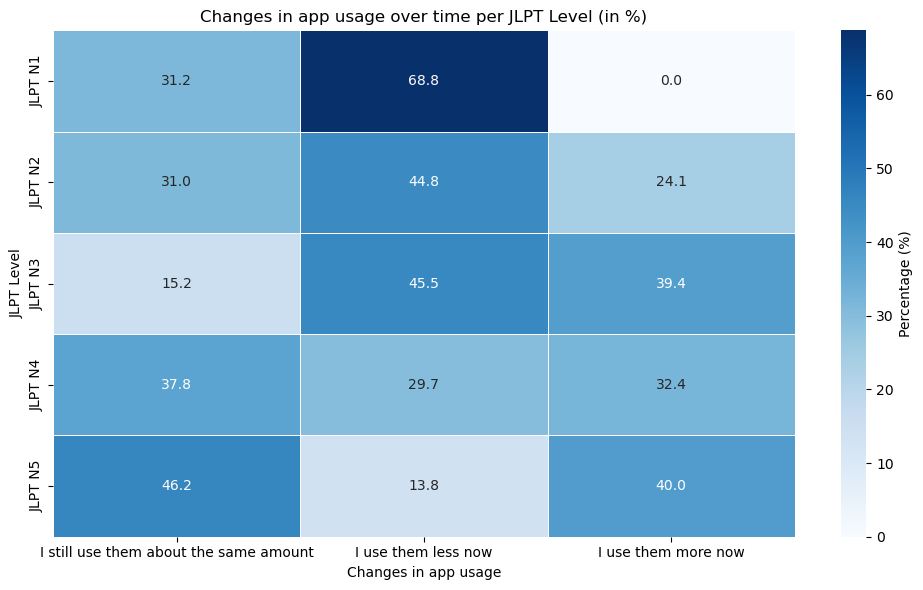

In [40]:
# No longer useful features per level

skill_improvement_usage_habits_exploded = survey_results_clean[(survey_results_clean["current_level"] != "I really don't know")&(survey_results_clean["has_participant_used_apps"] == True)].explode("skill_improvement_usage_habits_Apps")

skill_improvement_usage_habits_counts = skill_improvement_usage_habits_exploded.groupby(["current_level", "skill_improvement_usage_habits_Apps"]).size().unstack(fill_value=0)

skill_improvement_usage_habits_normalized_df = skill_improvement_usage_habits_counts.div(level_counts, axis=0)

skill_improvement_usage_habits_percentage_df = skill_improvement_usage_habits_normalized_df * 100
skill_improvement_usage_habits_percentage_df = skill_improvement_usage_habits_percentage_df.round(3)

print(skill_improvement_usage_habits_percentage_df)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(skill_improvement_usage_habits_percentage_df, annot=True, fmt=".1f", cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Percentage (%)'})
plt.title("Changes in app usage over time per JLPT Level (in %)")
plt.ylabel("JLPT Level")
plt.xlabel("Changes in app usage")
plt.tight_layout()
plt.show()


In [41]:

skill_improvement_usage_habits_counts["n"] = level_counts

skill_improvement_usage_habits_counts.T

current_level                           JLPT N1  JLPT N2  JLPT N3  JLPT N4  \
skill_improvement_usage_habits_Apps                                          
I still use them about the same amount        5        9        5       14   
I use them less now                          11       13       15       11   
I use them more now                           0        7       13       12   
n                                            16       29       33       37   

current_level                           JLPT N5  
skill_improvement_usage_habits_Apps              
I still use them about the same amount       30  
I use them less now                           9  
I use them more now                          26  
n                                            65

feel_apps_help_Apps   Maybe      No     Yes
current_level                              
JLPT N1              18.750   6.250  75.000
JLPT N2              27.586  10.345  62.069
JLPT N3              18.182   6.061  75.758
JLPT N4              18.919   2.703  78.378
JLPT N5              16.923   3.077  80.000


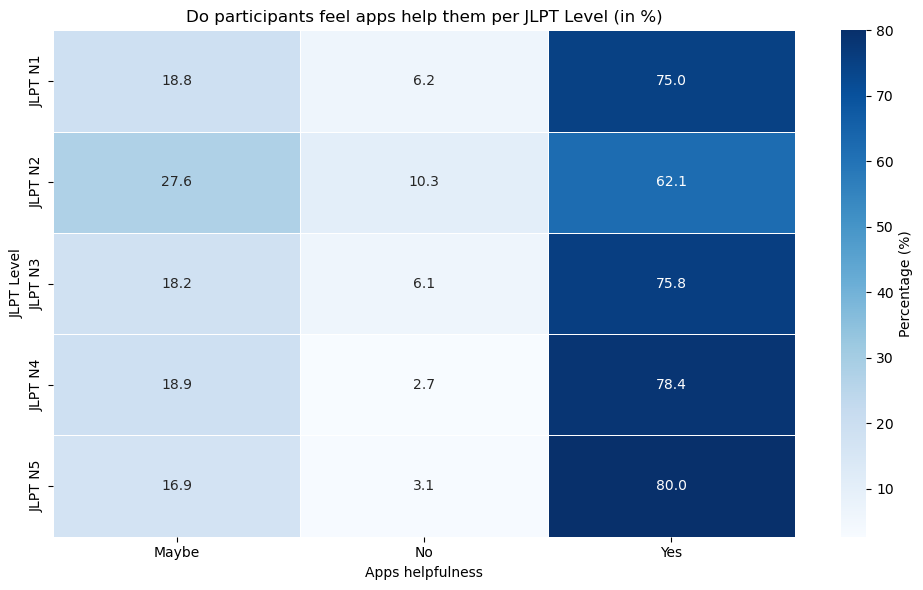

In [42]:
# No longer useful features per level

feel_apps_help_Apps_exploded = survey_results_clean[(survey_results_clean["current_level"] != "I really don't know")&(survey_results_clean["has_participant_used_apps"] == True)].explode("feel_apps_help_Apps")

feel_apps_help_Apps_exploded_counts = feel_apps_help_Apps_exploded.groupby(["current_level", "feel_apps_help_Apps"]).size().unstack(fill_value=0)

feel_apps_help_Apps_exploded_normalized_df = feel_apps_help_Apps_exploded_counts.div(level_counts, axis=0)

feel_apps_help_Apps_exploded_percentage_df = feel_apps_help_Apps_exploded_normalized_df * 100
feel_apps_help_Apps_exploded_percentage_df = feel_apps_help_Apps_exploded_percentage_df.round(3)

print(feel_apps_help_Apps_exploded_percentage_df)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(feel_apps_help_Apps_exploded_percentage_df, annot=True, fmt=".1f", cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Percentage (%)'})
plt.title("Do participants feel apps help them per JLPT Level (in %)")
plt.ylabel("JLPT Level")
plt.xlabel("Apps helpfulness")
plt.tight_layout()
plt.show()


In [43]:

feel_apps_help_Apps_exploded_counts["n"] = level_counts

feel_apps_help_Apps_exploded_counts.T

current_level        JLPT N1  JLPT N2  JLPT N3  JLPT N4  JLPT N5
feel_apps_help_Apps                                             
Maybe                      3        8        6        7       11
No                         1        3        2        1        2
Yes                       12       18       25       29       52
n                         16       29       33       37       65

why_continue_usage_Apps  Because they provide a structured learning path  \
current_level                                                              
JLPT N1                                                            6.250   
JLPT N2                                                           31.034   
JLPT N3                                                           39.394   
JLPT N4                                                           48.649   
JLPT N5                                                           63.077   

why_continue_usage_Apps  For community reasons  For fun  \
current_level                                             
JLPT N1                                  6.250   25.000   
JLPT N2                                  6.897   20.690   
JLPT N3                                 12.121   24.242   
JLPT N4                                  5.405   45.946   
JLPT N5                                  9.231   44.615   

why_continue_usage_Apps  I don't use them anymore  It

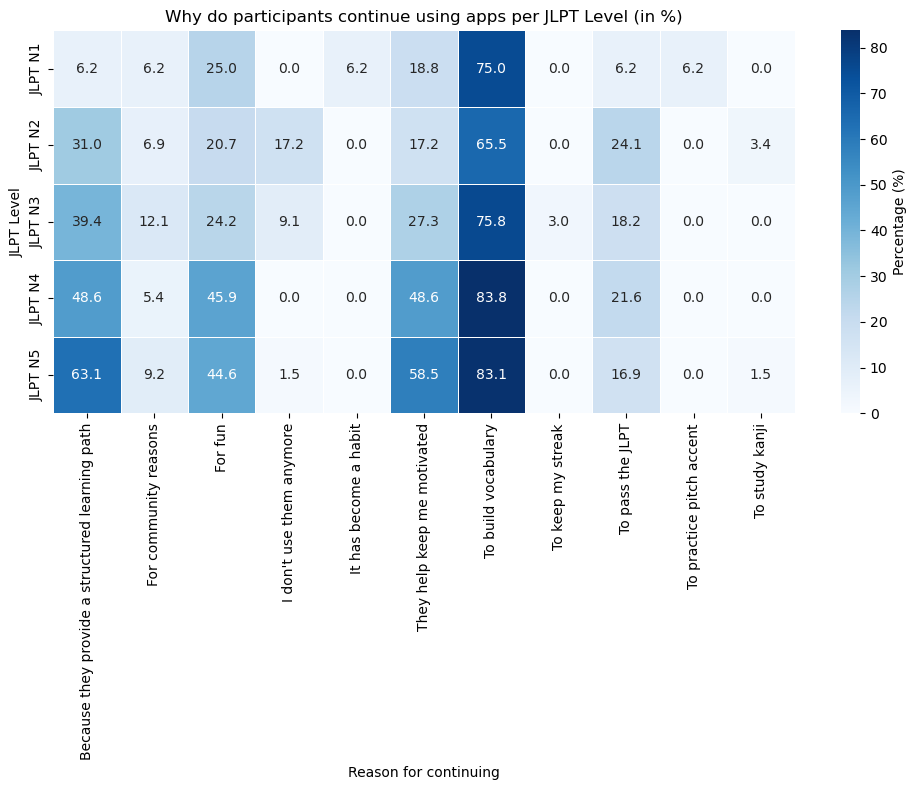

In [44]:

# No longer useful features per level

why_continue_usage_Apps_exploded = survey_results_clean[(survey_results_clean["current_level"] != "I really don't know")&(survey_results_clean["has_participant_used_apps"] == True)].explode("why_continue_usage_Apps")

why_continue_usage_Apps_exploded_counts = why_continue_usage_Apps_exploded.groupby(["current_level", "why_continue_usage_Apps"]).size().unstack(fill_value=0)

why_continue_usage_Apps_exploded_normalized_df = why_continue_usage_Apps_exploded_counts.div(level_counts, axis=0)

why_continue_usage_Apps_exploded_percentage_df = why_continue_usage_Apps_exploded_normalized_df * 100
why_continue_usage_Apps_exploded_percentage_df = why_continue_usage_Apps_exploded_percentage_df.round(3)

print(why_continue_usage_Apps_exploded_percentage_df)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(why_continue_usage_Apps_exploded_percentage_df, annot=True, fmt=".1f", cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Percentage (%)'})
plt.title("Why do participants continue using apps per JLPT Level (in %)")
plt.ylabel("JLPT Level")
plt.xlabel("Reason for continuing")
plt.tight_layout()
plt.show()


In [45]:
why_continue_usage_Apps_exploded_counts["n"] = level_counts

why_continue_usage_Apps_exploded_counts.T

current_level                                    JLPT N1  JLPT N2  JLPT N3  \
why_continue_usage_Apps                                                      
Because they provide a structured learning path        1        9       13   
For community reasons                                  1        2        4   
For fun                                                4        6        8   
I don't use them anymore                               0        5        3   
It has become a habit                                  1        0        0   
They help keep me motivated                            3        5        9   
To build vocabulary                                   12       19       25   
To keep my streak                                      0        0        1   
To pass the JLPT                                       1        7        6   
To practice pitch accent                               1        0        0   
To study kanji                                         0        1        0   
n                                                     16       29       33   

current_level                                    JLPT N4  JLPT N5  
why_continue_usage_Apps                                            
Because they provide a structured learning path       18       41  
For community reasons                                  2        6  
For fun                                               17       29  
I don't use them anymore                               0        1  
It has become a habit                                  0        0  
They help keep me motivated                           18       38  
To build vocabulary                                   31       54  
To keep my streak                                      0        0  
To pass the JLPT                                       8       11  
To practice pitch accent                               0        0  
To study kanji                                         0        1  
n                                                     37       65

# WRQ3: What is the correlation between the JLPT wordlists and the wordlists in these GLA's?

In [47]:
print(wordlist)

       Rank Word  Occurrences  Duolingo_Words  JLPT_Words JLPT_Level
0       1.0    の  100210912.0               1           1         N5
1       2.0    に   48486620.0               1           1         N5
2       3.0    を   45359475.0               1           1         N5
3       4.0    は   44889871.0               1           1         N5
4       5.0    年   36248501.0               1           1         N5
...     ...  ...          ...             ...         ...        ...
14422   NaN  兼ねて          NaN               0           1         N1
14423   NaN  沈める          NaN               0           1         N1
14424   NaN  聴診器          NaN               0           1         N1
14425   NaN  誂える          NaN               0           1         N1
14426   NaN  即する          NaN               0           1         N1

[14427 rows x 6 columns]


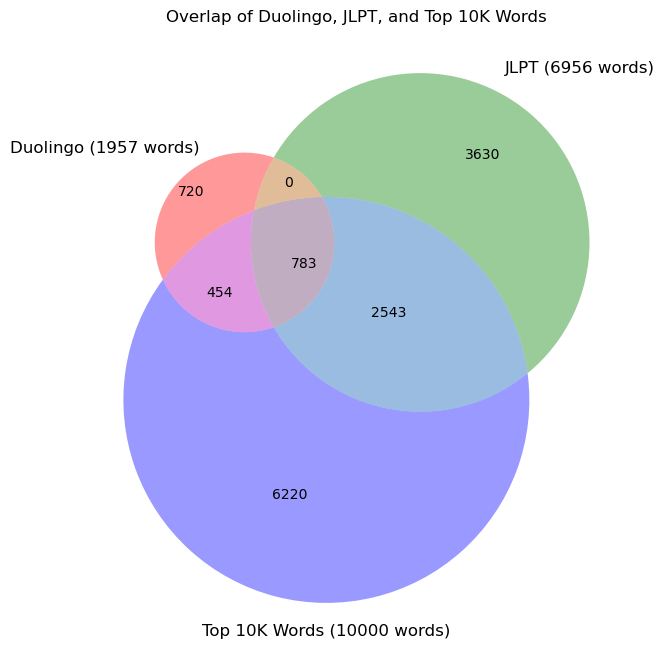

In [48]:
from matplotlib_venn import venn3

# Calculate overlaps
duolingo_words = set(wordlist[wordlist['Duolingo_Words'] == 1]['Word'])
jlpt_words = set(wordlist[wordlist['JLPT_Words'] == 1]['Word'])
top_10k_words = set(wordlist.iloc[:10000]['Word'])


# Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3([duolingo_words, jlpt_words, top_10k_words], 
             (f'Duolingo ({len(duolingo_words)} words)', 
              f'JLPT ({len(jlpt_words)} words)', 
              f'Top 10K Words ({len(top_10k_words)} words)'))
plt.title("Overlap of Duolingo, JLPT, and Top 10K Words")
plt.show()


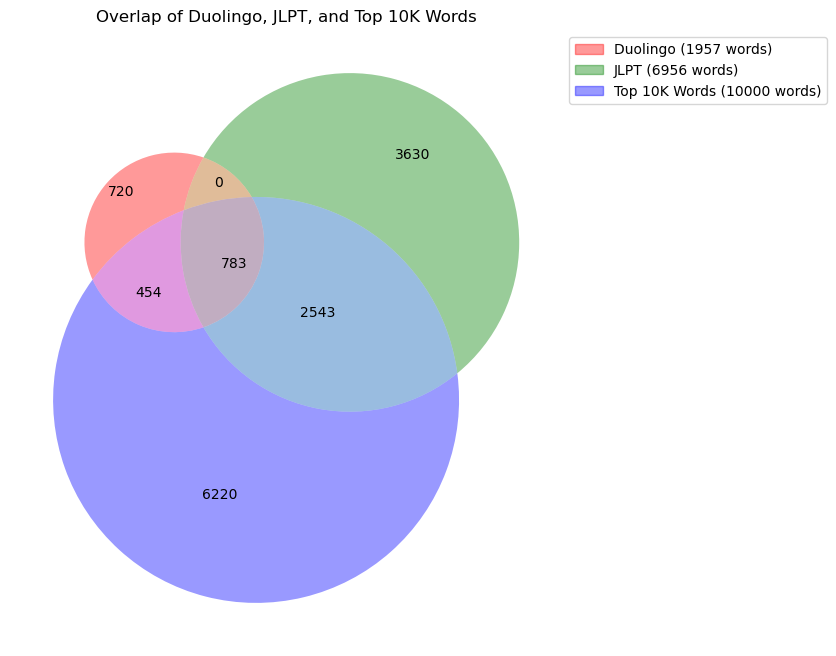

In [49]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import matplotlib.patches as mpatches

# Extract sets
duolingo_words = set(wordlist[wordlist['Duolingo_Words'] == 1]['Word'])
jlpt_words = set(wordlist[wordlist['JLPT_Words'] == 1]['Word'])
top_10k_words = set(wordlist.iloc[:10000]['Word'])

# Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3([duolingo_words, jlpt_words, top_10k_words], ('', '', ''))  # No circle labels

# Update labels with actual word counts
venn.get_label_by_id('100').set_text(len(duolingo_words - jlpt_words - top_10k_words))  # Only Duolingo
venn.get_label_by_id('010').set_text(len(jlpt_words - duolingo_words - top_10k_words))  # Only JLPT
venn.get_label_by_id('001').set_text(len(top_10k_words - duolingo_words - jlpt_words))  # Only Top 10K
venn.get_label_by_id('110').set_text(len(duolingo_words & jlpt_words - top_10k_words))  # Duolingo & JLPT
venn.get_label_by_id('011').set_text(len(jlpt_words & top_10k_words - duolingo_words))  # JLPT & Top 10K
venn.get_label_by_id('101').set_text(len(duolingo_words & top_10k_words - jlpt_words))  # Duolingo & Top 10K
venn.get_label_by_id('111').set_text(len(duolingo_words & jlpt_words & top_10k_words))  # All three

# Title
plt.title("Overlap of Duolingo, JLPT, and Top 10K Words")

# Create a custom legend with counts in the labels
duolingo_patch = mpatches.Patch(color=venn.get_patch_by_id('100').get_facecolor(), label=f'Duolingo ({len(duolingo_words)} words)')
jlpt_patch = mpatches.Patch(color=venn.get_patch_by_id('010').get_facecolor(), label=f'JLPT ({len(jlpt_words)} words)')
top_10k_patch = mpatches.Patch(color=venn.get_patch_by_id('001').get_facecolor(), label=f'Top 10K Words ({len(top_10k_words)} words)')

# Position the legend outside the plot to the right
plt.legend(handles=[duolingo_patch, jlpt_patch, top_10k_patch], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


JLPT Words (Expected: 7033): 7033
Only JLPT: 3707
Only Duolingo: 720
Only Top 10K: 6220
Duolingo & JLPT: 0
JLPT & Top 10K: 2543
Duolingo & Top 10K: 454
All Three: 783


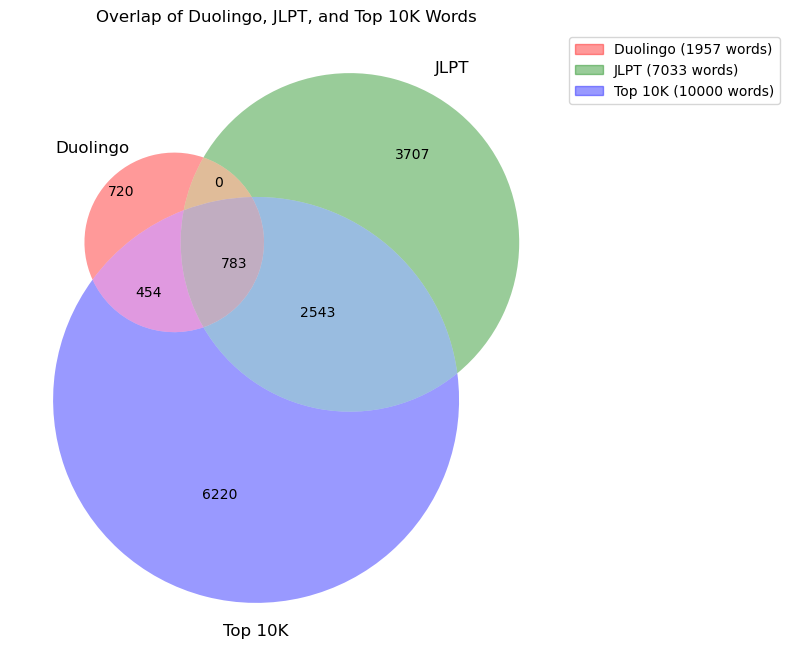

In [50]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import matplotlib.patches as mpatches

# Extract boolean masks
is_duolingo = wordlist['Duolingo_Words'] == 1
is_jlpt = wordlist['JLPT_Words'] == 1
is_top_10k = wordlist.index < 10000  # Top 10K is just first 10K rows

# Compute actual sets
only_duolingo = wordlist[is_duolingo & ~is_jlpt & ~is_top_10k]
only_jlpt = wordlist[is_jlpt & ~is_duolingo & ~is_top_10k]
only_top_10k = wordlist[is_top_10k & ~is_duolingo & ~is_jlpt]
duolingo_jlpt = wordlist[is_duolingo & is_jlpt & ~is_top_10k]
jlpt_top_10k = wordlist[is_jlpt & is_top_10k & ~is_duolingo]
duolingo_top_10k = wordlist[is_duolingo & is_top_10k & ~is_jlpt]
all_three = wordlist[is_duolingo & is_jlpt & is_top_10k]

# Print to verify correctness
print(f"JLPT Words (Expected: 7033): {wordlist[is_jlpt]['Word'].count()}")
print(f"Only JLPT: {only_jlpt.shape[0]}")
print(f"Only Duolingo: {only_duolingo.shape[0]}")
print(f"Only Top 10K: {only_top_10k.shape[0]}")
print(f"Duolingo & JLPT: {duolingo_jlpt.shape[0]}")
print(f"JLPT & Top 10K: {jlpt_top_10k.shape[0]}")
print(f"Duolingo & Top 10K: {duolingo_top_10k.shape[0]}")
print(f"All Three: {all_three.shape[0]}")

# Create Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3([set(wordlist[is_duolingo]['Word']),
              set(wordlist[is_jlpt]['Word']),
              set(wordlist[is_top_10k]['Word'])], ('Duolingo', 'JLPT', 'Top 10K'))

# Update labels
venn.get_label_by_id('100').set_text(only_duolingo.shape[0])
venn.get_label_by_id('010').set_text(only_jlpt.shape[0])
venn.get_label_by_id('001').set_text(only_top_10k.shape[0])
venn.get_label_by_id('110').set_text(duolingo_jlpt.shape[0])
venn.get_label_by_id('011').set_text(jlpt_top_10k.shape[0])
venn.get_label_by_id('101').set_text(duolingo_top_10k.shape[0])
venn.get_label_by_id('111').set_text(all_three.shape[0])

# Title
plt.title("Overlap of Duolingo, JLPT, and Top 10K Words")

# Custom legend
duolingo_patch = mpatches.Patch(color=venn.get_patch_by_id('100').get_facecolor(), label=f'Duolingo ({wordlist[is_duolingo]["Word"].nunique()} words)')
jlpt_patch = mpatches.Patch(color=venn.get_patch_by_id('010').get_facecolor(), label=f'JLPT ({wordlist[is_jlpt]["Word"].count()} words)')
top_10k_patch = mpatches.Patch(color=venn.get_patch_by_id('001').get_facecolor(), label=f'Top 10K ({wordlist[is_top_10k]["Word"].nunique()} words)')

plt.legend(handles=[duolingo_patch, jlpt_patch, top_10k_patch], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [51]:
with pd.option_context('display.max_rows', None, 'display.max_colwidth', None):
    print(wordlist[wordlist['JLPT_Words'] == 1]['Word'].value_counts().sum())

7033


In [52]:
wordlist[wordlist["Word"]=="食べ"].tail(50)

Rank Word  Occurrences  Duolingo_Words  JLPT_Words JLPT_Level
3274  3275.0   食べ      57059.0               0           0        NaN

In [53]:
# Identify JLPT words not in Duolingo
gap_words = wordlist[(wordlist['JLPT_Words'] == 1) & (wordlist['Duolingo_Words'] == 0)]
print(f"Number of JLPT words not covered by Duolingo: {len(gap_words)}")
print(gap_words.head())


Number of JLPT words not covered by Duolingo: 6250
    Rank Word  Occurrences  Duolingo_Words  JLPT_Words JLPT_Level
19  20.0   利用   10474017.0               0           1         N4
28  29.0    第    5552379.0               0           1         N1
33  34.0   です    4603205.0               0           1         N5
35  36.0   会話    4511440.0               0           1         N4
51  52.0   依頼    3077750.0               0           1         N3


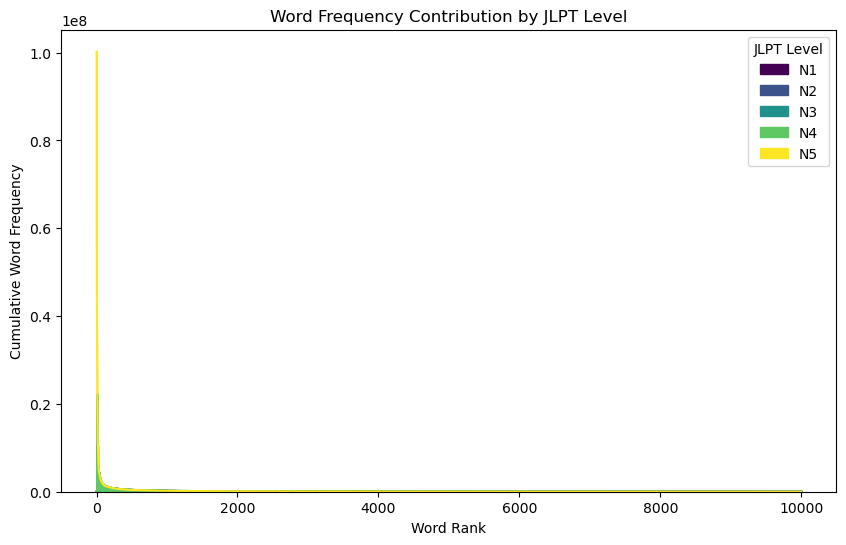

In [54]:
# Calculate cumulative frequency contribution
df_sorted = wordlist.sort_values(by='Rank')
df_sorted['Cumulative_Frequency'] = df_sorted['Occurrences'].cumsum()

df_sorted['JLPT_Contribution'] = df_sorted.groupby('JLPT_Level')['Occurrences'].cumsum()

pivot_area = df_sorted.pivot_table(index='Rank', columns='JLPT_Level', values='Occurrences', aggfunc='sum')

pivot_area.plot.area(stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Word Frequency Contribution by JLPT Level')
plt.ylabel('Cumulative Word Frequency')
plt.xlabel('Word Rank')
plt.legend(title='JLPT Level')
plt.show()

Defaulting to user installation because normal site-packages is not writeable


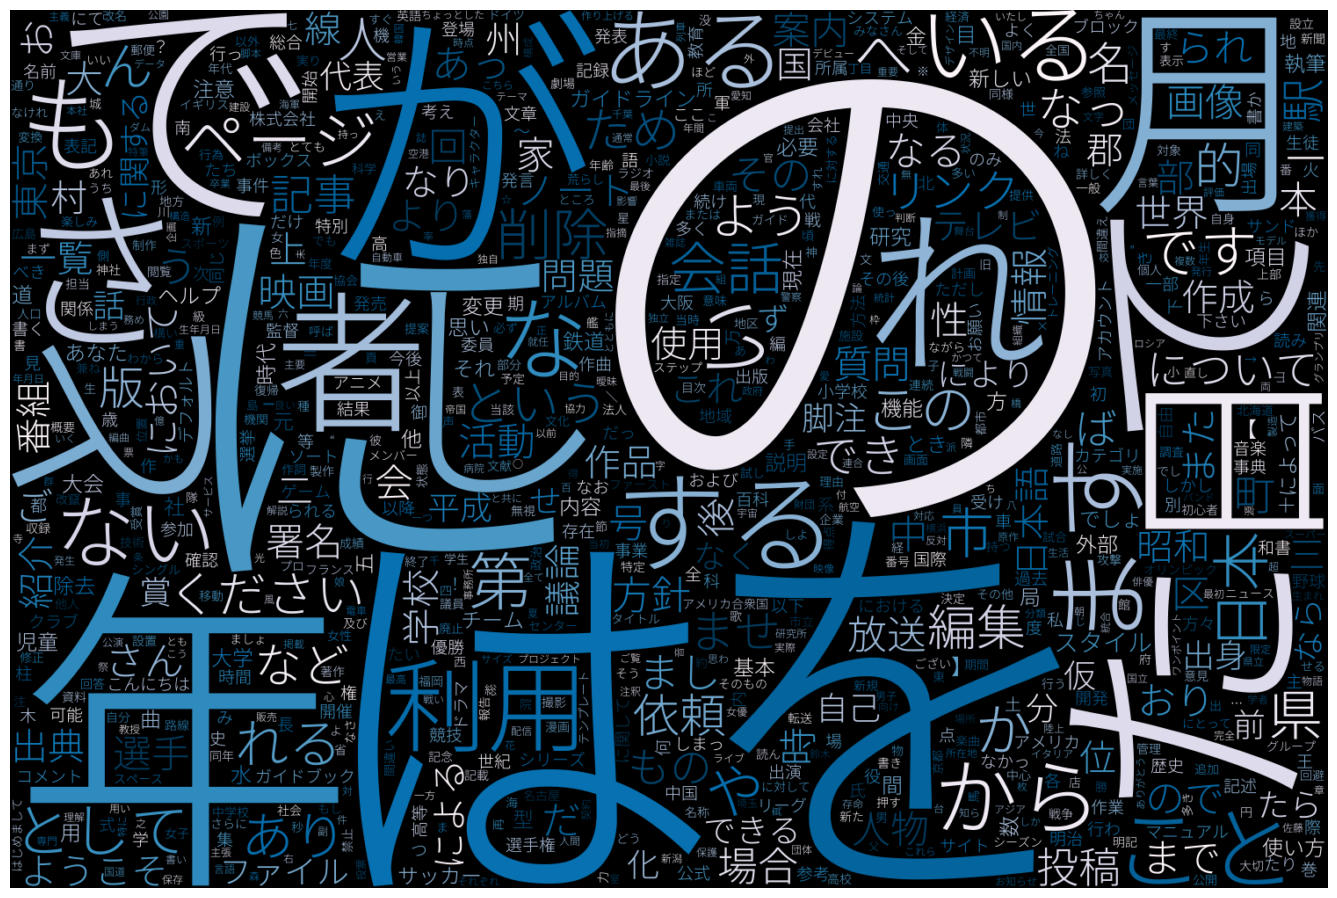

In [55]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def make_word_cloud(words_freq_dict):
  # setup Japanese font for creating the word cloud
  font_path = 'NotoSansJP-Light.ttf'
  # create an image with a Word Cloud with the given word frequencies
  wordcloud = WordCloud(width=1500,
                        height=1000,
                        max_words=900,
                        colormap='PuBu',
                        font_path=font_path,
                        normalize_plurals=True).generate_from_frequencies(words_freq_dict)
  # setup a plot frame without any axis and print the image generated above  
  plt.figure(figsize=(17,14))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

# Convert df_sorted into the required dictionary format
freq_dict = dict(zip(df_sorted['Word'], df_sorted['Occurrences']))
make_word_cloud(freq_dict)

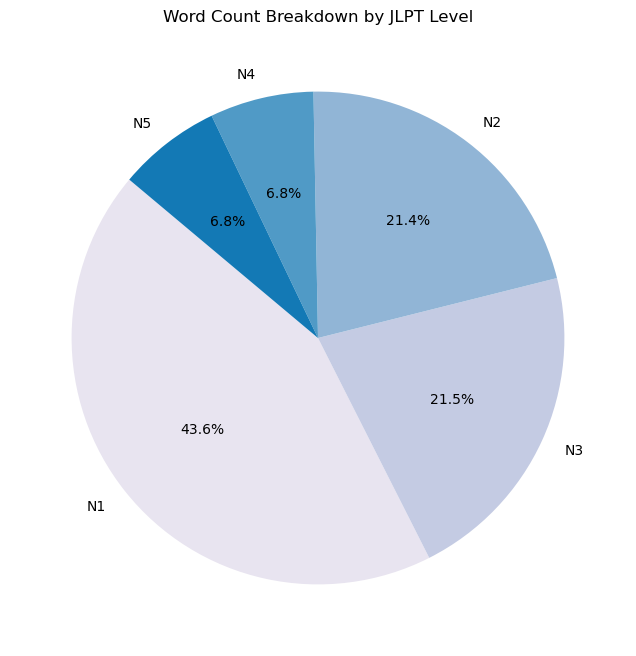

In [56]:
# Count words by JLPT Level
jlpt_counts = wordlist['JLPT_Level'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(jlpt_counts, labels=jlpt_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('PuBu'))
plt.title('Word Count Breakdown by JLPT Level')
plt.show()

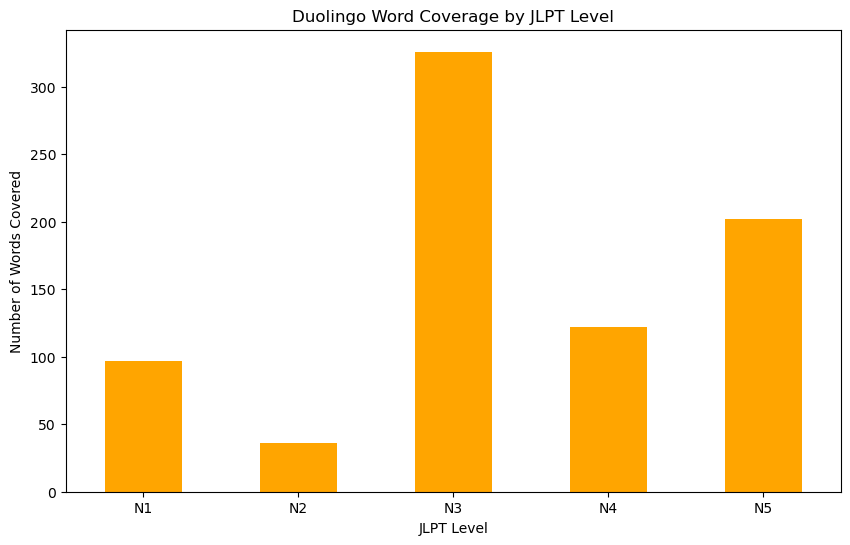

In [57]:
# Filter words taught by Duolingo
duolingo_words = df_sorted[df_sorted['Duolingo_Words'] == 1]

# Count words per JLPT level for Duolingo
jlpt_duolingo = duolingo_words['JLPT_Level'].value_counts().sort_index()

# Plot Duolingo coverage by JLPT Level
plt.figure(figsize=(10, 6))
jlpt_duolingo.plot(kind='bar', color='orange')
plt.title("Duolingo Word Coverage by JLPT Level")
plt.xlabel("JLPT Level")
plt.ylabel("Number of Words Covered")
plt.xticks(rotation=0)
plt.show()


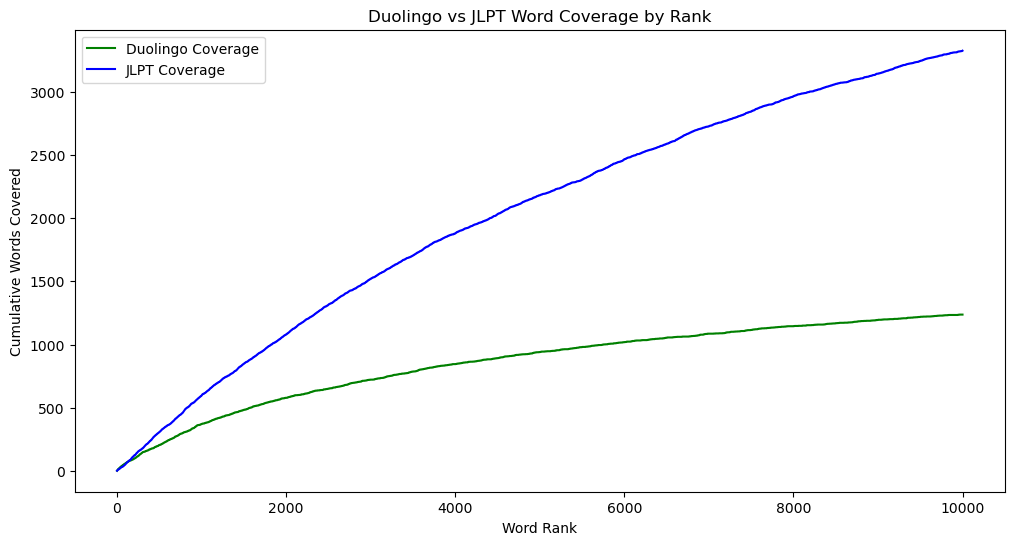

In [58]:
plt.figure(figsize=(12, 6))

# Plot Duolingo Coverage
plt.plot(df_sorted['Rank'], df_sorted['Duolingo_Words'].cumsum(), label="Duolingo Coverage", color='green')

# Plot JLPT Coverage
plt.plot(df_sorted['Rank'], df_sorted['JLPT_Words'].cumsum(), label="JLPT Coverage", color='blue')

plt.xlabel("Word Rank")
plt.ylabel("Cumulative Words Covered")
plt.title("Duolingo vs JLPT Word Coverage by Rank")
plt.legend()
plt.show()


C:\Users\mathi\AppData\Local\Temp\ipykernel_220628\2613962896.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(df_sorted, values='JLPT_Words', index='Rank_Bin', columns='JLPT_Level', aggfunc='sum', fill_value=0)


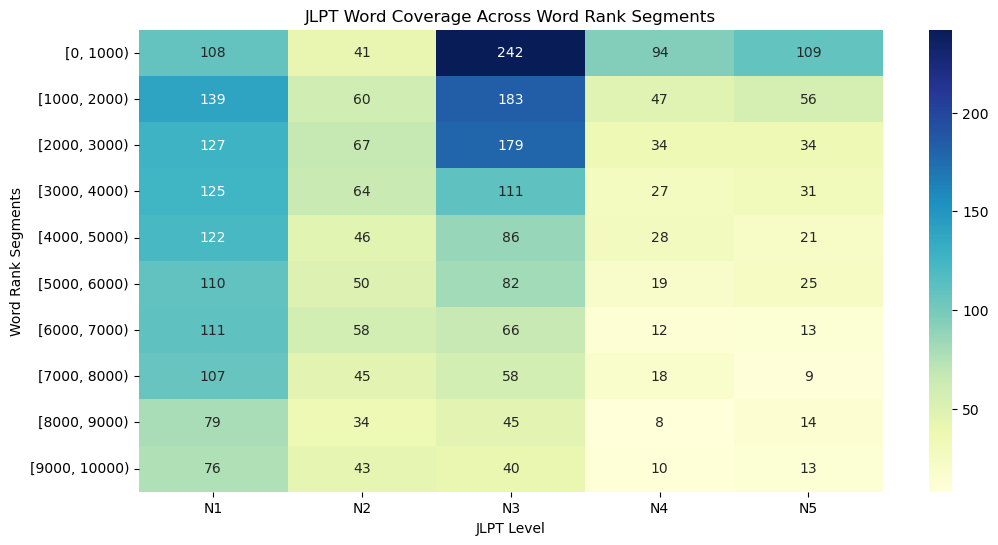

In [59]:
import seaborn as sns

df_sorted['Rank_Bin'] = pd.cut(df_sorted['Rank'], bins=range(0, 11000, 1000), right=False)

heatmap_data = pd.pivot_table(df_sorted, values='JLPT_Words', index='Rank_Bin', columns='JLPT_Level', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title("JLPT Word Coverage Across Word Rank Segments")
plt.xlabel("JLPT Level")
plt.ylabel("Word Rank Segments")
plt.show()


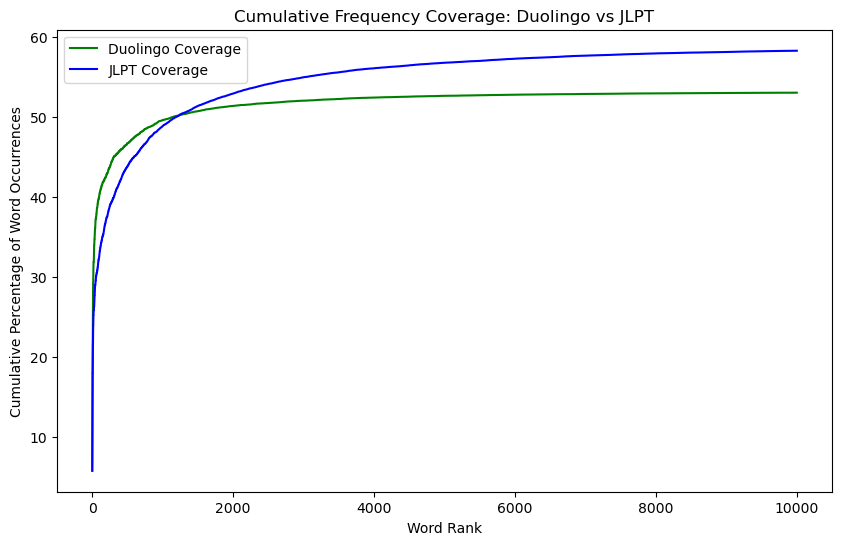

In [60]:
total_occurrences = df_sorted['Occurrences'].sum()

df_sorted['Cumulative_Duolingo'] = df_sorted['Duolingo_Words'] * df_sorted['Occurrences']
df_sorted['Cumulative_JLPT'] = df_sorted['JLPT_Words'] * df_sorted['Occurrences']

df_sorted['Duolingo_Percent'] = df_sorted['Cumulative_Duolingo'].cumsum() / total_occurrences * 100
df_sorted['JLPT_Percent'] = df_sorted['Cumulative_JLPT'].cumsum() / total_occurrences * 100

plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Rank'], df_sorted['Duolingo_Percent'], label="Duolingo Coverage", color='green')
plt.plot(df_sorted['Rank'], df_sorted['JLPT_Percent'], label="JLPT Coverage", color='blue')
plt.xlabel("Word Rank")
plt.ylabel("Cumulative Percentage of Word Occurrences")
plt.title("Cumulative Frequency Coverage: Duolingo vs JLPT")
plt.legend()
plt.show()


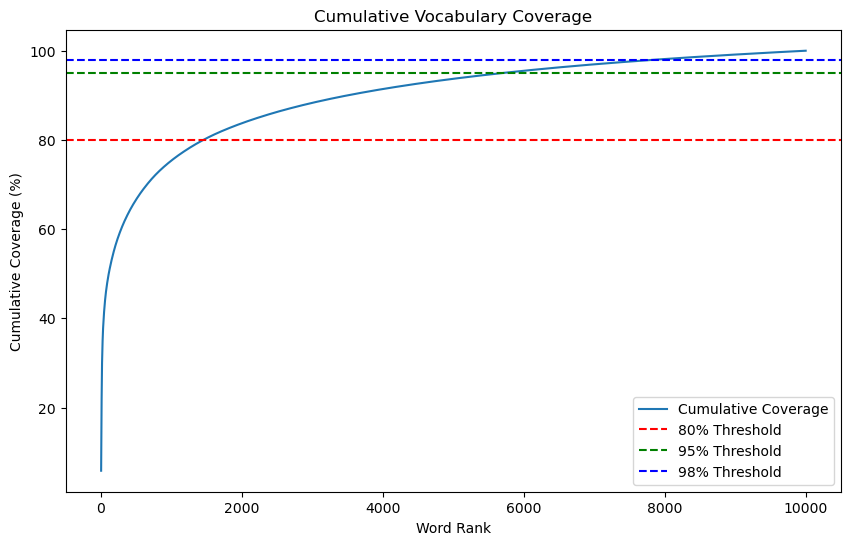

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Combined_Wordlist.csv')
df = df.sort_values(by='Rank')

df['Cumulative_Occurrences'] = df['Occurrences'].cumsum()
df['Coverage_Percentage'] = df['Cumulative_Occurrences'] / df['Occurrences'].sum() * 100

plt.figure(figsize=(10, 6))
plt.plot(df['Rank'], df['Coverage_Percentage'], label='Cumulative Coverage')
plt.axhline(y=80, color='r', linestyle='--', label='80% Threshold')
plt.axhline(y=95, color='g', linestyle='--', label='95% Threshold')
plt.axhline(y=98, color='b', linestyle='--', label='98% Threshold')
plt.xlabel('Word Rank')
plt.ylabel('Cumulative Coverage (%)')
plt.title('Cumulative Vocabulary Coverage')
plt.legend()
plt.show()


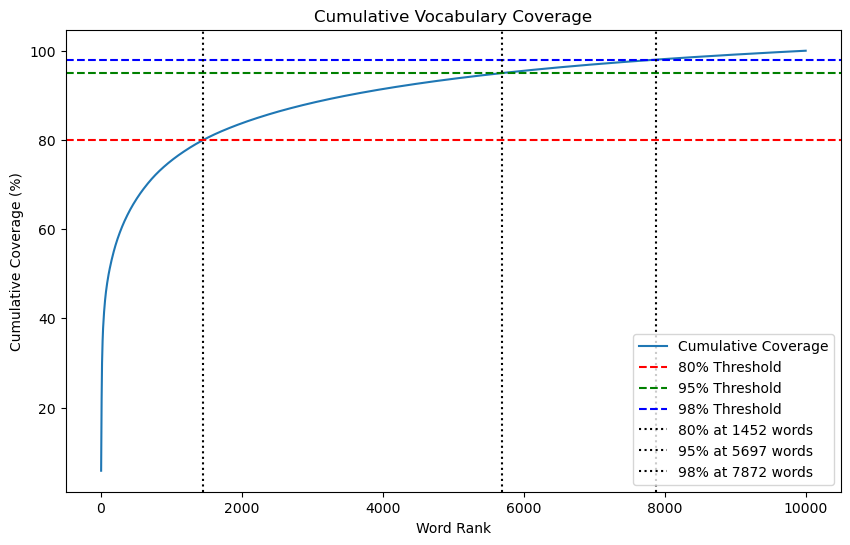

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Combined_Wordlist.csv')
df = df.sort_values(by='Rank')

df['Cumulative_Occurrences'] = df['Occurrences'].cumsum()
df['Coverage_Percentage'] = df['Cumulative_Occurrences'] / df['Occurrences'].sum() * 100

plt.figure(figsize=(10, 6))
plt.plot(df['Rank'], df['Coverage_Percentage'], label='Cumulative Coverage')
plt.axhline(y=80, color='r', linestyle='--', label='80% Threshold')
plt.axhline(y=95, color='g', linestyle='--', label='95% Threshold')
plt.axhline(y=98, color='b', linestyle='--', label='98% Threshold')

thresholds = [80, 95, 98]
for threshold in thresholds:
    threshold_rank = df[df['Coverage_Percentage'] >= threshold].iloc[0]['Rank']
    plt.axvline(x=threshold_rank, color='black', linestyle=':', label=f'{threshold}% at {threshold_rank.astype(int)} words')

plt.xlabel('Word Rank')
plt.ylabel('Cumulative Coverage (%)')
plt.title('Cumulative Vocabulary Coverage')

plt.legend()
plt.show()


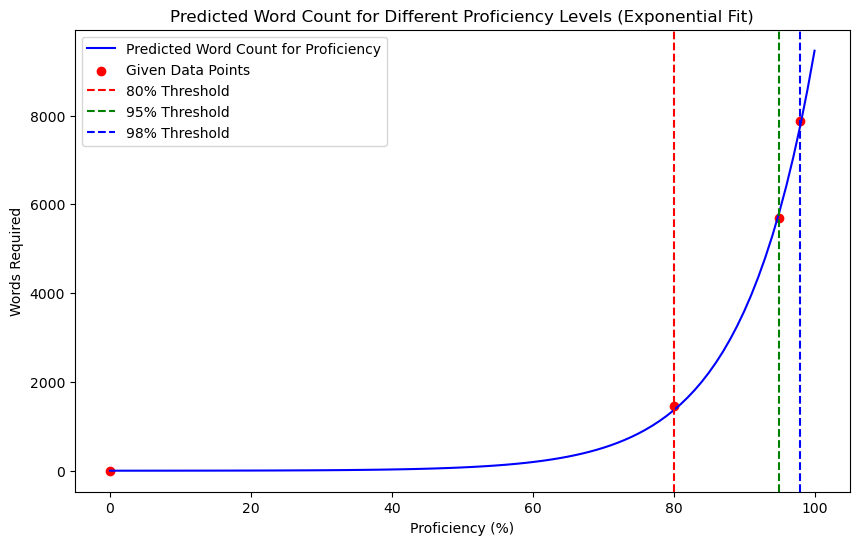

Predicted words for 99% proficiency: 8585.421877864737
Predicted words for 100% proficiency: 9459.578364046623


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given values for words required to reach certain proficiency levels
proficiency_levels = [0, 80, 95, 98]
words_required = [0, 1452, 5697, 7872]

def exp_func(x, a, b):
    return a * np.exp(b * x)

params, covariance = curve_fit(exp_func, proficiency_levels, words_required, p0=(1, 0.05))

x_range = np.arange(0, 101, 1)
y_pred = exp_func(x_range, *params)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_pred, label='Predicted Word Count for Proficiency', color='blue')

plt.scatter(proficiency_levels, words_required, color='red', label='Given Data Points')

plt.axvline(x=80, color='r', linestyle='--', label='80% Threshold')
plt.axvline(x=95, color='g', linestyle='--', label='95% Threshold')
plt.axvline(x=98, color='b', linestyle='--', label='98% Threshold')

plt.title('Predicted Word Count for Different Proficiency Levels (Exponential Fit)')
plt.xlabel('Proficiency (%)')
plt.ylabel('Words Required')
plt.legend()

plt.show()

predicted_99 = exp_func(99, *params)
predicted_100 = exp_func(100, *params)

print(f'Predicted words for 99% proficiency: {predicted_99}')
print(f'Predicted words for 100% proficiency: {predicted_100}')


                    Rank  Occurrences  Duolingo_Words  JLPT_Words
Rank            1.000000    -0.145916       -0.248340   -0.265991
Occurrences    -0.145916     1.000000        0.130414    0.056096
Duolingo_Words -0.248340     0.130414        1.000000   -0.069258
JLPT_Words     -0.265991     0.056096       -0.069258    1.000000


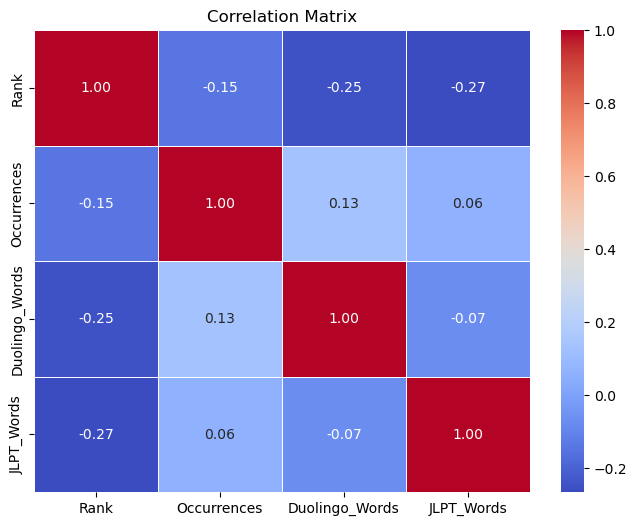

In [64]:
print(wordlist[["Rank","Occurrences","Duolingo_Words","JLPT_Words"]].corr())

corr_matrix = wordlist[["Rank", "Occurrences", "Duolingo_Words", "JLPT_Words"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

## When start intermediate plateau?
This should not be percentages!

In [70]:
# No longer useful features per level
# Level counts for all the situations where non-app users need to be filtered out
level_counts_intermediatePlateau = survey_results_clean[(survey_results_clean["current_level"] != "I really don't know") &
                                                        ((survey_results_clean["experienced_intermediate_plateau_Apps"] == True) |
                                                        (survey_results_clean["experienced_intermediate_plateau_noApps"] == True))]["current_level"].value_counts().sort_index()

intermediatePlateau_exploded = survey_results_clean[(survey_results_clean["current_level"] != "I really don't know")&((survey_results_clean['experienced_intermediate_plateau_noApps']==True)|(survey_results_clean['experienced_intermediate_plateau_Apps']==True))].explode("when_start_intermediatePlateau")

participants_experienced_intermediatePlateau = (intermediatePlateau_exploded['experienced_intermediate_plateau_Apps'].value_counts()+intermediatePlateau_exploded['experienced_intermediate_plateau_noApps'].value_counts())

intermediatePlateau_exploded_counts = intermediatePlateau_exploded.groupby(["current_level", "when_start_intermediatePlateau"]).size().unstack(fill_value=0)

print(intermediatePlateau_exploded_counts)

# Mean, median etc is based on what each level gave as reply, so columns are "mean", "median", "sd", "mode"

intermediatePlateau_mean = participants_experienced_intermediatePlateau
#print(intermediatePlateau_exploded_counts.value_counts())

when_start_intermediatePlateau   0  1   2  3  4  5  8
current_level                                        
JLPT N1                          0  1   4  1  2  2  0
JLPT N2                          4  2   5  1  4  4  0
JLPT N3                          8  1  11  4  1  2  1
JLPT N4                          4  7   6  5  1  0  0
JLPT N5                         33  3   4  3  0  0  0


In [71]:
from scipy import stats

index = intermediatePlateau_exploded_counts.index
columns = intermediatePlateau_exploded_counts.columns.astype(int)

means, medians, std_devs, modes, counts = [], [], [], [], []

for i, row in intermediatePlateau_exploded_counts.iterrows():
    values = []
    weights = []
    for year in columns:
        count = row[str(year)] if str(year) in row else 0
        if count > 0:
            values.extend([year] * int(count))
            weights.append(int(count))
    values_array = np.array(values)

    if len(values_array) > 0:
        means.append(np.average(values_array))
        medians.append(np.median(values_array))
        std_devs.append(np.std(values_array, ddof=1))
        mode_result = stats.mode(values_array, keepdims=True)
        modes.append(mode_result.mode[0])
        counts.append(len(values_array))
    else:
        means.append(np.nan)
        medians.append(np.nan)
        std_devs.append(np.nan)
        modes.append(np.nan)
        counts.append(0)

# Assemble into DataFrame
stats_df = pd.DataFrame({
    "n": counts,
    "mean": means,
    "median": medians,
    "std_dev": std_devs,
    "mode": modes
}, index=index)

print(stats_df)

                n      mean  median   std_dev  mode
current_level                                      
JLPT N1        10  3.000000     2.5  1.414214     2
JLPT N2        20  2.550000     2.0  1.848897     2
JLPT N3        28  2.035714     2.0  1.875419     2
JLPT N4        23  1.652174     2.0  1.152416     1
JLPT N5        43  0.465116     0.0  0.934748     0


In [72]:
from scipy import stats
import numpy as np
import pandas as pd

index = intermediatePlateau_exploded_counts.index
columns = intermediatePlateau_exploded_counts.columns.astype(int)

means, medians, std_devs, modes, counts = [], [], [], [], []
actual_counts = {str(year): [] for year in columns}

for i, row in intermediatePlateau_exploded_counts.iterrows():
    values = []
    weights = []
    for year in columns:
        count = row[str(year)] if str(year) in row else 0
        if count > 0:
            values.extend([year] * int(count))
            weights.append(int(count))
        actual_counts[str(year)].append(count)

    values_array = np.array(values)

    if len(values_array) > 0:
        means.append(np.average(values_array))
        medians.append(np.median(values_array))
        std_devs.append(np.std(values_array, ddof=1))
        mode_result = stats.mode(values_array, keepdims=True)
        modes.append(mode_result.mode[0])
        counts.append(len(values_array))
    else:
        means.append(np.nan)
        medians.append(np.nan)
        std_devs.append(np.nan)
        modes.append(np.nan)
        counts.append(0)

stats_df = pd.DataFrame({
    "n": counts,
    "mean": means,
    "median": medians,
    "std_dev": std_devs,
    "mode": modes
}, index=index)

counts_df = pd.DataFrame(actual_counts, index=index)

print("Statistical Summary:")
print(stats_df)

print("\nActual Counts Table:")
print(counts_df)


Statistical Summary:
                n      mean  median   std_dev  mode
current_level                                      
JLPT N1        10  3.000000     2.5  1.414214     2
JLPT N2        20  2.550000     2.0  1.848897     2
JLPT N3        28  2.035714     2.0  1.875419     2
JLPT N4        23  1.652174     2.0  1.152416     1
JLPT N5        43  0.465116     0.0  0.934748     0

Actual Counts Table:
                0  1   2  3  4  5  8
current_level                       
JLPT N1         0  1   4  1  2  2  0
JLPT N2         4  2   5  1  4  4  0
JLPT N3         8  1  11  4  1  2  1
JLPT N4         4  7   6  5  1  0  0
JLPT N5        33  3   4  3  0  0  0


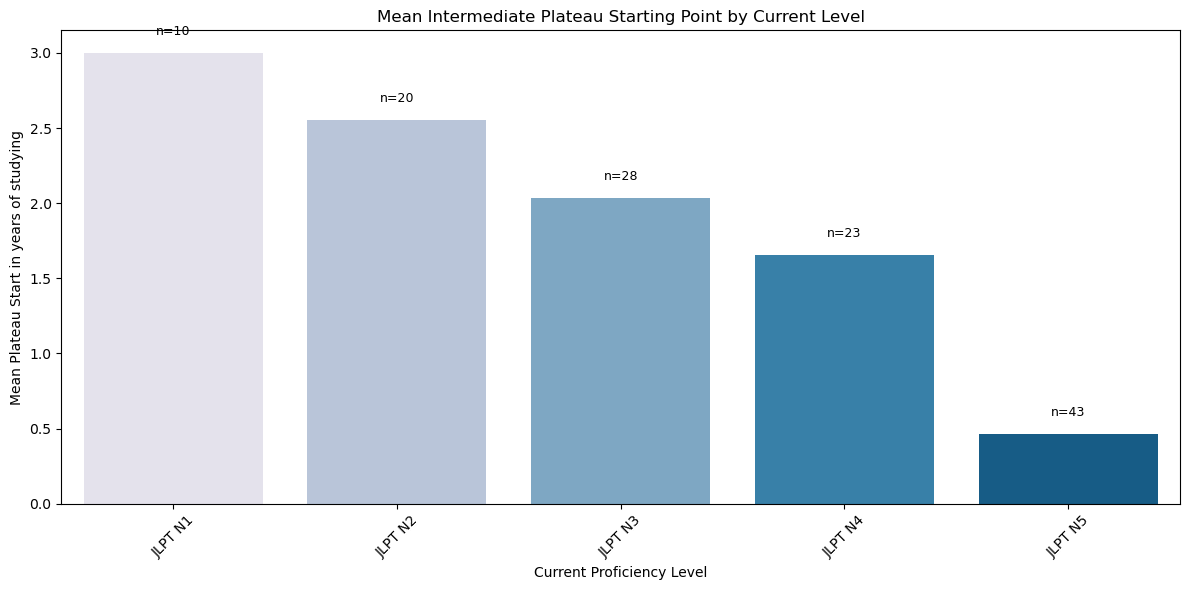

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

stats_df = stats_df.sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=stats_df.index, y=stats_df["mean"], palette="PuBu")

for i, (mean, n) in enumerate(zip(stats_df["mean"], stats_df["n"])):
    plt.text(i, mean + 0.1, f"n={int(n)}", ha='center', va='bottom', fontsize=9)

plt.title("Mean Intermediate Plateau Starting Point by Current Level")
plt.ylabel("Mean Plateau Start in years of studying")
plt.xlabel("Current Proficiency Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [74]:
statsinverted_df = stats_df.iloc[::-1]
statsinverted_df

n      mean  median   std_dev  mode
current_level                                      
JLPT N5        43  0.465116     0.0  0.934748     0
JLPT N4        23  1.652174     2.0  1.152416     1
JLPT N3        28  2.035714     2.0  1.875419     2
JLPT N2        20  2.550000     2.0  1.848897     2
JLPT N1        10  3.000000     2.5  1.414214     2

In [75]:
stats_df

n      mean  median   std_dev  mode
current_level                                      
JLPT N1        10  3.000000     2.5  1.414214     2
JLPT N2        20  2.550000     2.0  1.848897     2
JLPT N3        28  2.035714     2.0  1.875419     2
JLPT N4        23  1.652174     2.0  1.152416     1
JLPT N5        43  0.465116     0.0  0.934748     0

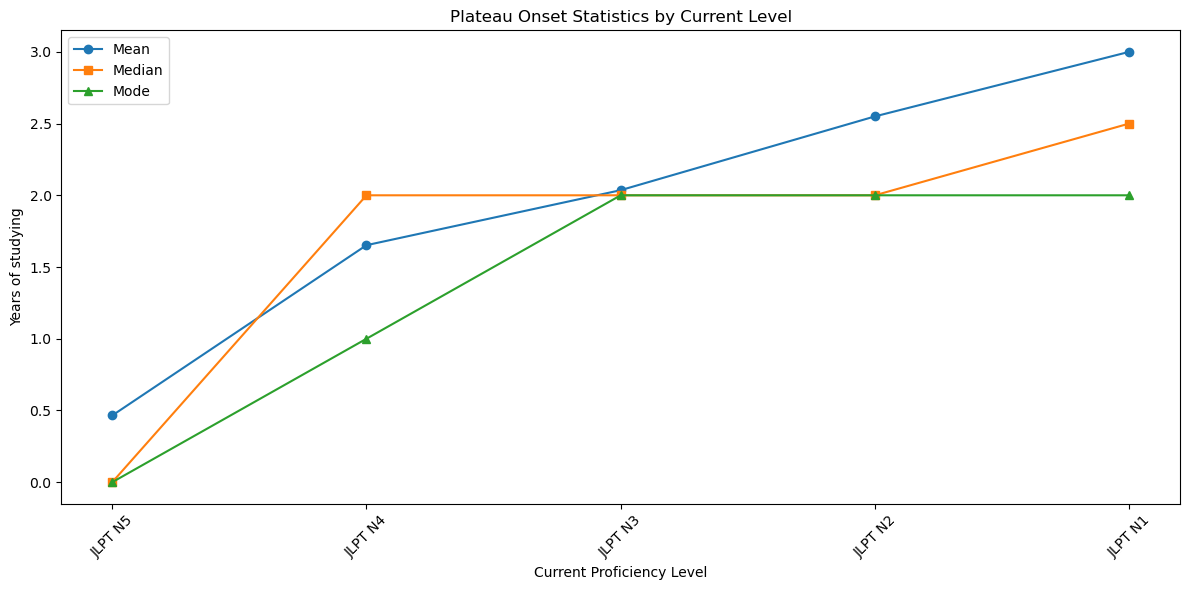

In [76]:
plt.figure(figsize=(12, 6))

plt.plot(statsinverted_df.index, statsinverted_df["mean"], label="Mean", marker="o")
plt.plot(statsinverted_df.index, statsinverted_df["median"], label="Median", marker="s")
plt.plot(statsinverted_df.index, statsinverted_df["mode"], label="Mode", marker="^")

plt.title("Plateau Onset Statistics by Current Level")
plt.ylabel("Years of studying")
plt.xlabel("Current Proficiency Level")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


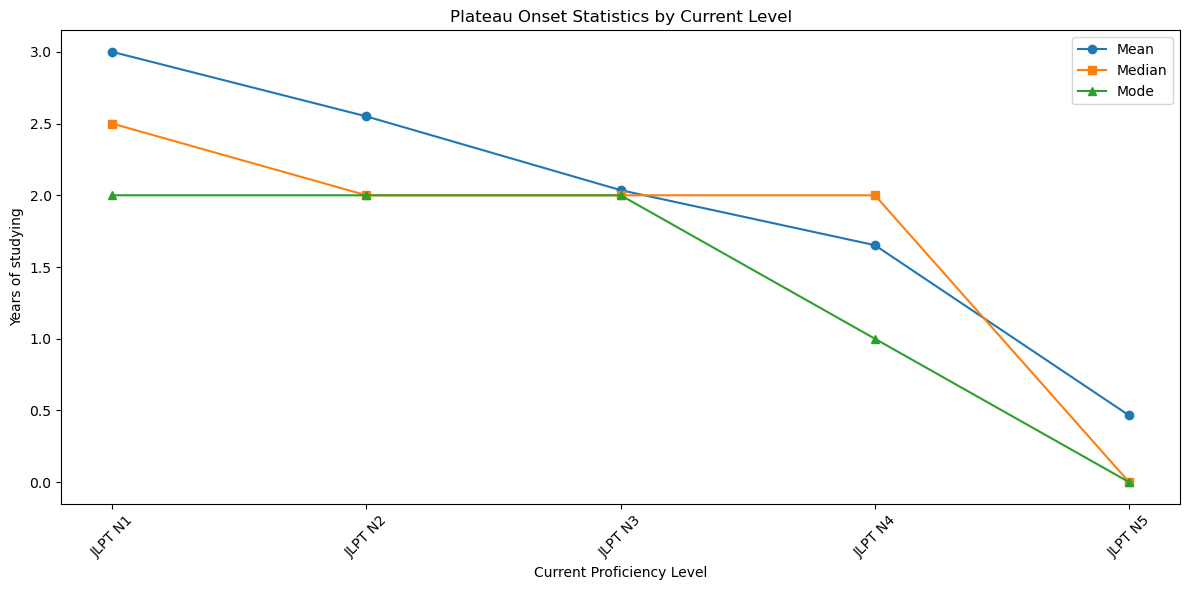

In [77]:
plt.figure(figsize=(12, 6))

plt.plot(stats_df.index, stats_df["mean"], label="Mean", marker="o")
plt.plot(stats_df.index, stats_df["median"], label="Median", marker="s")
plt.plot(stats_df.index, stats_df["mode"], label="Mode", marker="^")

plt.title("Plateau Onset Statistics by Current Level")
plt.ylabel("Years of studying")
plt.xlabel("Current Proficiency Level")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


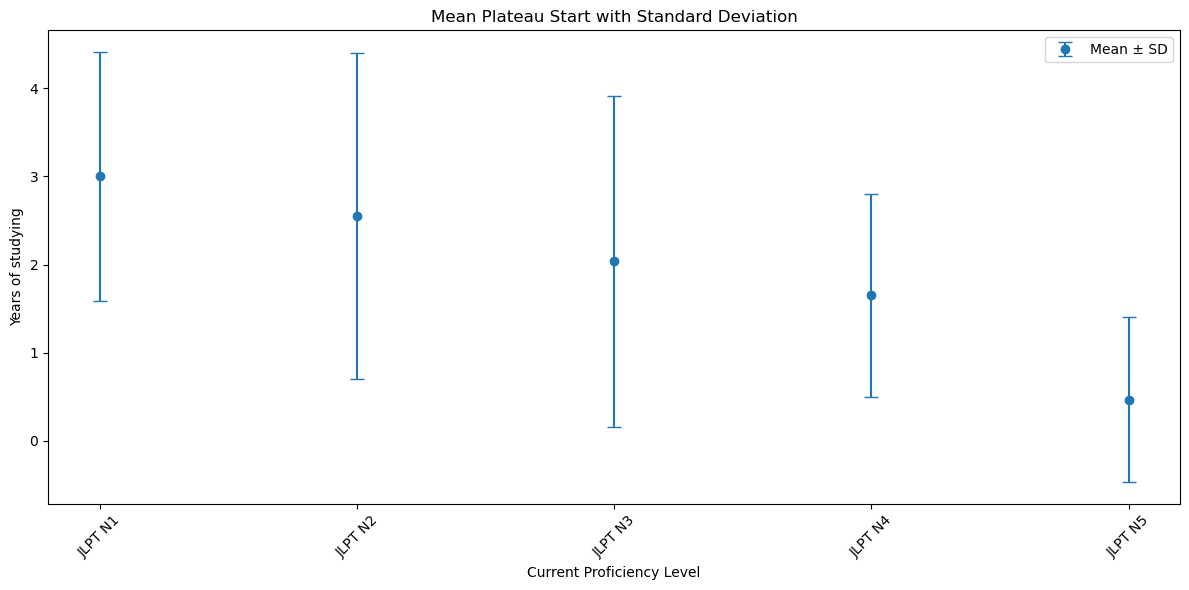

In [78]:
plt.figure(figsize=(12, 6))

plt.errorbar(stats_df.index, stats_df["mean"], yerr=stats_df["std_dev"], fmt="o", capsize=5, label="Mean ± SD")

plt.title("Mean Plateau Start with Standard Deviation")
plt.ylabel("Years of studying")
plt.xlabel("Current Proficiency Level")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


##  What level did the intermediate plateau start?
##  Change this, this way of looking at the data doesn't make sense

In [79]:
# No longer useful features per level

intermediatePlateau_exploded = survey_results_clean[(survey_results_clean["current_level"] != "I really don't know")&((survey_results_clean['experienced_intermediate_plateau_noApps']==True)|(survey_results_clean['experienced_intermediate_plateau_Apps']==True))].explode("what_level_start_intermediatePlateau")

participants_experienced_intermediatePlateau = (intermediatePlateau_exploded['experienced_intermediate_plateau_Apps'].value_counts()+intermediatePlateau_exploded['experienced_intermediate_plateau_noApps'].value_counts())

intermediatePlateau_exploded_counts = intermediatePlateau_exploded.groupby(["current_level", "what_level_start_intermediatePlateau"]).size().unstack(fill_value=0)

print(intermediatePlateau_exploded_counts)

intermediatePlateau_mean = participants_experienced_intermediatePlateau

what_level_start_intermediatePlateau  I do not know  JLPT N1  JLPT N2  \
current_level                                                           
JLPT N1                                           0        3        5   
JLPT N2                                           3        0        7   
JLPT N3                                           4        0        0   
JLPT N4                                           2        0        0   
JLPT N5                                          16        0        0   

what_level_start_intermediatePlateau  JLPT N3  JLPT N4  JLPT N5  
current_level                                                    
JLPT N1                                     2        0        0  
JLPT N2                                     6        5        0  
JLPT N3                                     4       15        4  
JLPT N4                                     0       13       12  
JLPT N5                                     0        0       29  


In [80]:
stats_df = pd.DataFrame(index=intermediatePlateau_exploded_counts.index)
stats_df["n"] = intermediatePlateau_exploded_counts.sum(axis=1)
stats_df["mean"] = intermediatePlateau_exploded_counts.mean(axis=1)
stats_df["median"] = intermediatePlateau_exploded_counts.median(axis=1)
stats_df["std_dev"] = intermediatePlateau_exploded_counts.std(axis=1)
stats_df["mode"] = intermediatePlateau_exploded_counts.mode(axis=1)[0]  # take first mode if multiple

print(stats_df)

                n      mean  median    std_dev  mode
current_level                                       
JLPT N1        10  1.666667     1.0   2.065591     0
JLPT N2        21  3.500000     4.0   3.016621     0
JLPT N3        27  4.500000     4.0   5.504544     4
JLPT N4        27  4.500000     1.0   6.252999     0
JLPT N5        45  7.500000     0.0  12.324772     0


In [81]:
# Compute statistical summary
stats_df = pd.DataFrame(index=intermediatePlateau_exploded_counts.index)
stats_df["n"] = intermediatePlateau_exploded_counts.sum(axis=1)
stats_df["mean"] = intermediatePlateau_exploded_counts.mean(axis=1)
stats_df["median"] = intermediatePlateau_exploded_counts.median(axis=1)
stats_df["std_dev"] = intermediatePlateau_exploded_counts.std(axis=1)
stats_df["mode"] = intermediatePlateau_exploded_counts.mode(axis=1).iloc[:, 0]  # Take first mode if multiple

# Store actual counts per category in a separate table
counts_df = intermediatePlateau_exploded_counts.copy()

# Print both tables
print("Statistical Summary:")
print(stats_df)

print("\nActual Counts Table:")
print(counts_df)


Statistical Summary:
                n      mean  median    std_dev  mode
current_level                                       
JLPT N1        10  1.666667     1.0   2.065591     0
JLPT N2        21  3.500000     4.0   3.016621     0
JLPT N3        27  4.500000     4.0   5.504544     4
JLPT N4        27  4.500000     1.0   6.252999     0
JLPT N5        45  7.500000     0.0  12.324772     0

Actual Counts Table:
what_level_start_intermediatePlateau  I do not know  JLPT N1  JLPT N2  \
current_level                                                           
JLPT N1                                           0        3        5   
JLPT N2                                           3        0        7   
JLPT N3                                           4        0        0   
JLPT N4                                           2        0        0   
JLPT N5                                          16        0        0   

what_level_start_intermediatePlateau  JLPT N3  JLPT N4  JLPT N5  
current_

In [82]:
intermediate_plateau_data = survey_results_clean[(survey_results_clean["current_level"] != "I really don't know")&((survey_results_clean['experienced_intermediate_plateau_noApps']==True)|(survey_results_clean['experienced_intermediate_plateau_Apps']==True))]

data = intermediate_plateau_data[["current_level", "what_level_start_intermediatePlateau"]]

df = pd.DataFrame(data)

df_filtered = df[df["current_level"] != "I really don't know"]

df_exploded = df_filtered.explode("what_level_start_intermediatePlateau")

count_table  = pd.crosstab(df_exploded["current_level"], df_exploded["what_level_start_intermediatePlateau"])

n_values = count_table.sum(axis=1)

percentage_table = count_table.div(count_table.sum(axis=1), axis=0) * 100

percentage_table["n"] = n_values

count_table["n"] = n_values

column_order = ["JLPT N1", "JLPT N2", "JLPT N3", "JLPT N4", "JLPT N5", "I do not know", "n"]
percentage_table = percentage_table.reindex(columns=column_order, fill_value=0)
count_table = count_table.reindex(columns=column_order, fill_value=0)

count_table

what_level_start_intermediatePlateau  JLPT N1  JLPT N2  JLPT N3  JLPT N4  \
current_level                                                              
JLPT N1                                     3        5        2        0   
JLPT N2                                     0        7        6        5   
JLPT N3                                     0        0        4       15   
JLPT N4                                     0        0        0       13   
JLPT N5                                     0        0        0        0   

what_level_start_intermediatePlateau  JLPT N5  I do not know   n  
current_level                                                     
JLPT N1                                     0              0  10  
JLPT N2                                     0              3  21  
JLPT N3                                     4              4  27  
JLPT N4                                    12              2  27  
JLPT N5                                    29             16  45

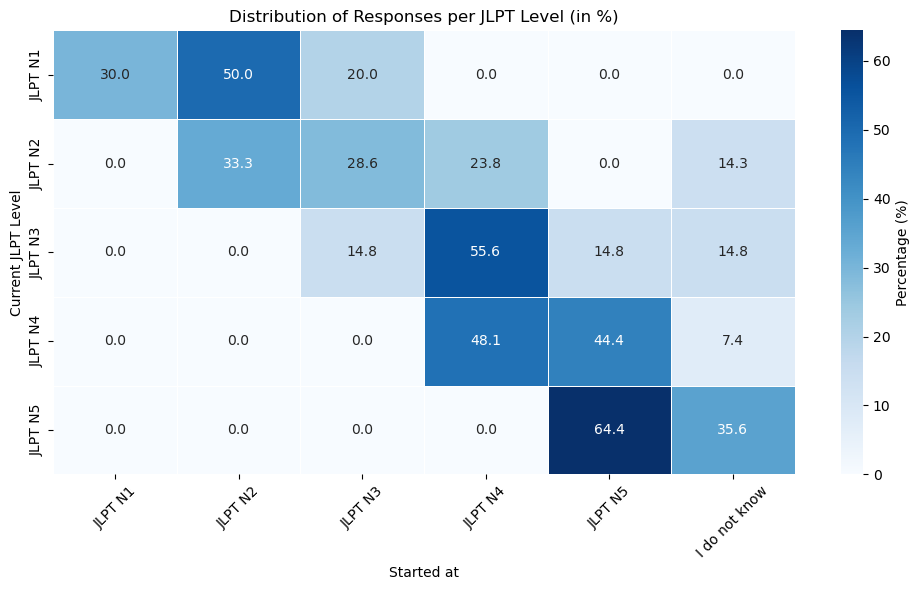

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

counts_percentage_df = intermediatePlateau_exploded_counts.div(intermediatePlateau_exploded_counts.sum(axis=1), axis=0) * 100

column_order = ["JLPT N1", "JLPT N2", "JLPT N3", "JLPT N4", "JLPT N5", "I do not know"]
counts_percentage_df = counts_percentage_df.reindex(columns=column_order, fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(counts_percentage_df, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5, cbar_kws={"label": "Percentage (%)"})

plt.title("Distribution of Responses per JLPT Level (in %)")
plt.ylabel("Current JLPT Level")
plt.xlabel("Started at")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


##  features_helping_intermediatePlateau

In [84]:
intermediate_plateau_data.groupby("current_level")["features_helping_intermediatePlateau"].value_counts()


current_level  features_helping_intermediatePlateau
JLPT N1        No                                       7
               Not sure                                 3
JLPT N2        No                                      12
               Not sure                                 5
               Yes                                      4
JLPT N3        No                                      15
               Not sure                                 7
               Yes                                      5
JLPT N4        No                                      14
               Yes                                      7
               Not sure                                 6
JLPT N5        No                                      20
               Yes                                     13
               Not sure                                12
Name: count, dtype: int64

In [85]:
features_helping_counts = pd.crosstab(
    intermediate_plateau_data["current_level"], 
    intermediate_plateau_data["features_helping_intermediatePlateau"]
)

features_helping_counts["n"] = features_helping_counts.sum(axis=1)

features_helping_counts.reset_index(inplace=True)

column_order = ["current_level","Yes", "No", "Not sure", "n"]
features_helping_counts = features_helping_counts.reindex(columns=column_order, fill_value=0)

print(features_helping_counts)


features_helping_intermediatePlateau current_level  Yes  No  Not sure   n
0                                          JLPT N1    0   7         3  10
1                                          JLPT N2    4  12         5  21
2                                          JLPT N3    5  15         7  27
3                                          JLPT N4    7  14         6  27
4                                          JLPT N5   13  20        12  45


In [86]:
features_helping_counts

features_helping_intermediatePlateau current_level  Yes  No  Not sure   n
0                                          JLPT N1    0   7         3  10
1                                          JLPT N2    4  12         5  21
2                                          JLPT N3    5  15         7  27
3                                          JLPT N4    7  14         6  27
4                                          JLPT N5   13  20        12  45

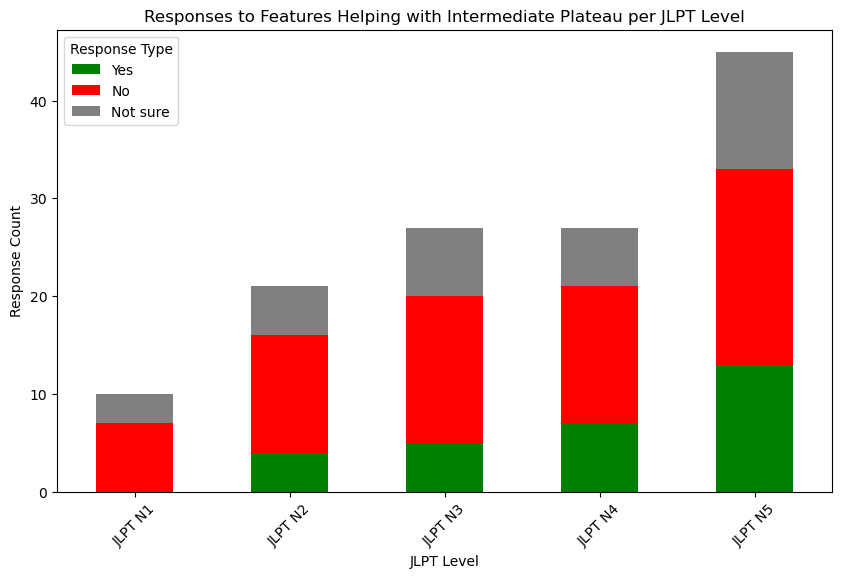

In [87]:
import matplotlib.pyplot as plt

colors = {"Yes": "green", "No": "red", "Not sure": "gray"}

ax = features_helping_counts.set_index("current_level")[["Yes", "No", "Not sure"]].plot(
    kind="bar",
    stacked=True,
    color=[colors[col] for col in ["Yes", "No", "Not sure"]],
    figsize=(10, 6),
)

plt.xlabel("JLPT Level")
plt.ylabel("Response Count")
plt.title("Responses to Features Helping with Intermediate Plateau per JLPT Level")
plt.xticks(rotation=45)
plt.legend(title="Response Type")

plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


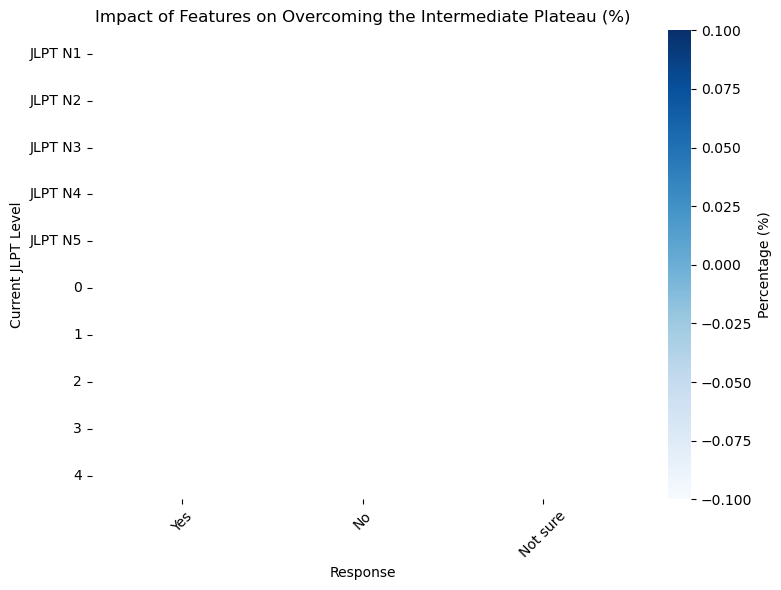

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

features_helping_percentage = features_helping_counts.set_index("current_level").div(
    features_helping_counts["n"], axis=0
) * 100

features_helping_percentage = features_helping_percentage.drop(columns=["n"])

plt.figure(figsize=(8, 6))
sns.heatmap(
    features_helping_percentage, 
    annot=True, 
    fmt=".1f", 
    cmap="Blues", 
    linewidths=0.5, 
    cbar_kws={"label": "Percentage (%)"}
)

plt.title("Impact of Features on Overcoming the Intermediate Plateau (%)")
plt.ylabel("Current JLPT Level")
plt.xlabel("Response")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


In [89]:
print(features_helping_counts.columns)


Index(['current_level', 'Yes', 'No', 'Not sure', 'n'], dtype='object', name='features_helping_intermediatePlateau')


## apps_enough_advanced_content_intermediatePlateau

In [90]:
intermediate_plateau_data["apps_enough_advanced_content_intermediatePlateau"].value_counts()

apps_enough_advanced_content_intermediatePlateau
No          54
Not sure    44
Yes         32
Name: count, dtype: int64

In [91]:
advanced_enough_counts = pd.crosstab(
    intermediate_plateau_data["current_level"], 
    intermediate_plateau_data["apps_enough_advanced_content_intermediatePlateau"]
)

advanced_enough_counts["n"] = advanced_enough_counts.sum(axis=1)

advanced_enough_counts.reset_index(inplace=True)

column_order = ["current_level","Yes", "No", "Not sure", "n"]
advanced_enough_counts = advanced_enough_counts.reindex(columns=column_order, fill_value=0)

print(advanced_enough_counts)


apps_enough_advanced_content_intermediatePlateau current_level  Yes  No  \
0                                                      JLPT N1    4   3   
1                                                      JLPT N2    5  11   
2                                                      JLPT N3    5  11   
3                                                      JLPT N4    9  10   
4                                                      JLPT N5    9  19   

apps_enough_advanced_content_intermediatePlateau  Not sure   n  
0                                                        3  10  
1                                                        5  21  
2                                                       11  27  
3                                                        8  27  
4                                                       17  45  


In [92]:
advanced_enough_counts

apps_enough_advanced_content_intermediatePlateau current_level  Yes  No  \
0                                                      JLPT N1    4   3   
1                                                      JLPT N2    5  11   
2                                                      JLPT N3    5  11   
3                                                      JLPT N4    9  10   
4                                                      JLPT N5    9  19   

apps_enough_advanced_content_intermediatePlateau  Not sure   n  
0                                                        3  10  
1                                                        5  21  
2                                                       11  27  
3                                                        8  27  
4                                                       17  45

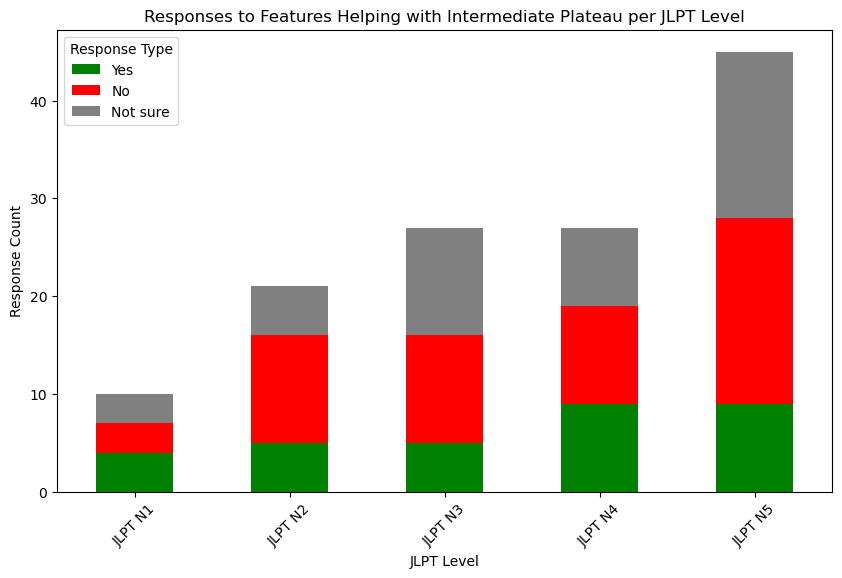

In [93]:
import matplotlib.pyplot as plt

colors = {"Yes": "green", "No": "red", "Not sure": "gray"}

ax = advanced_enough_counts.set_index("current_level")[["Yes", "No", "Not sure"]].plot(
    kind="bar",
    stacked=True,
    color=[colors[col] for col in ["Yes", "No", "Not sure"]],
    figsize=(10, 6),
)

plt.xlabel("JLPT Level")
plt.ylabel("Response Count")
plt.title("Responses to Features Helping with Intermediate Plateau per JLPT Level")
plt.xticks(rotation=45)
plt.legend(title="Response Type")

plt.show()


# Qualitative results

In [94]:
survey_results_clean.columns

Index(['Timestamp', 'current_level', 'study_years', 'native_languages',
       'other_languages', 'main_study_method', 'has_participant_used_apps',
       'reason_noApps', 'considered_using_noApps', 'used_apps_Apps',
       'most_useful_Apps', 'usage_frequency_Apps',
       'skill_improvement_usage_habits_Apps', 'most_useful_features_Apps',
       'least_useful_features_Apps', 'no_longer_useful_Apps',
       'feel_apps_help_Apps',
       'most_challenging_to_progress_intermediatePlateau',
       'experienced_intermediate_plateau_Apps',
       'when_start_intermediatePlateau',
       'what_level_start_intermediatePlateau',
       'tried_techniques_to_combat_intermediatePlateau', 'Email address',
       'Column 26', 'most_useful_current_level_Apps', 'daily_study_time_Apps',
       'features_helping_intermediatePlateau',
       'apps_enough_advanced_content_intermediatePlateau',
       'why_continue_usage_Apps', 'comparative_enjoyment_other_methods_Apps',
       'how_found_survey_final',


In [95]:
with pd.option_context('display.max_rows', None, 'display.max_colwidth', None):
    print(survey_results_clean[survey_results_clean["why_other_tools_noApps"].notna()]["why_other_tools_noApps"])

3      Language learning apps are too slow. Only teach you the first couple thousand words but they take a lot longer to teach them as opposed to immersion + anki. Plus for me immersion is more enjoyable than looking at arbitrary words or sentences over and over in a language learning app
26                                                                                                   Yomichan (or an alternative), I mainly read, and being able to instantly look up a word in either an English or Japanese dictionary makes it doable without knowing any words to begin with.
43                                                                                                   Acquisition is primarily driven through volume of exposure and time dedicated to sit app based learning is better spent engaging with natural language rather than gamified SRS or questions
51                                                                                                                                

In [96]:
with pd.option_context('display.max_rows', None, 'display.max_colwidth', None):
    print(survey_results_clean[survey_results_clean["overcoming_challenges_noApps"].notna()]["overcoming_challenges_noApps"])

3                                                                I was never demotivated for Japanese..,..specially while learning the basics. The language, culture and media were my motivation. For Chinese though, I've had to take it a lot easier to not get overwhelmed...so to not lose motivation I only do immersion and anki...I don't study grammar or hanzi or anything else..and I only do immersion ever 2 days
41                                                                                                                                                                                                                                                                                                                                              i motivate myself with the idea of being able to understand everything one day
43                                                                                                                                                                        

In [97]:
with pd.option_context('display.max_rows', None, 'display.max_colwidth', None):
    print(survey_results_clean[survey_results_clean["tried_techniques_to_combat_intermediatePlateau"]!= "nan"]["tried_techniques_to_combat_intermediatePlateau"])

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    mijn vrienden die me steunen helpen mij dit te overkomen en om mij te motiveren
2                                                                  

In [98]:
with pd.option_context('display.max_rows', None, 'display.max_colwidth', None):
    print(survey_results_clean[survey_results_clean["most_challenging_to_progress_intermediatePlateau"]!= "nan"]["most_challenging_to_progress_intermediatePlateau"])

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            het durven inzien dat fouten maken ook vooruitgaan is
1                                                                                                                                                                                                                                                                                    

In [99]:
non_app_users_JLPT = survey_results_clean[survey_results_clean["has_participant_used_apps"]==False]

# Study methods

# Step 2: Count occurrences of each study method per JLPT level
non_app_users_JLPT_counts = non_app_users_JLPT.groupby(["current_level", "has_participant_used_apps"]).size().unstack(fill_value=0)

non_app_users_JLPT_counts


has_participant_used_apps  False
current_level                   
I really don't know            1
JLPT N1                        8
JLPT N2                        1
JLPT N3                        3
JLPT N4                        1
JLPT N5                        1